In [ ]:
! pip install yfinance

In [ ]:
!pip install scikit-learn

In [ ]:
!pip install statsmodels==0.12.1

In [ ]:
!pip install eli5

In [17]:
!pip install factor_analyzer

  Created wheel for factor-analyzer: filename=factor_analyzer-0.4.0-py3-none-any.whl size=41444 sha256=03610c293b24e858340bb140f5b1fa273f737f9fbbbeef7306cf1178524cd936
  Stored in directory: c:\users\alexandre arriaga\appdata\local\pip\cache\wheels\00\cf\ea\83feab47e1d682730be5935c52a2647f49adfb393e948d4bf5
Successfully built factor-analyzer


In [54]:
!pip install bioinfokit

  Created wheel for bioinfokit: filename=bioinfokit-2.0.9-py3-none-any.whl size=57899 sha256=d05bcf82dcd929fef2e37c9593f04eb3b7578e5166566ffe35053054b2ecc488
  Stored in directory: c:\users\alexandre arriaga\appdata\local\pip\cache\wheels\2c\f5\d9\52c831e918b10c3137cf83805454583b62d2cdfd121a171172
  Created wheel for matplotlib-venn: filename=matplotlib_venn-0.11.7-py3-none-any.whl size=32157 sha256=9c36c055ba0c5d786403eb389654e8f6bd3891dce3a86105d092061b357af36e
  Stored in directory: c:\users\alexandre arriaga\appdata\local\pip\cache\wheels\fb\24\13\4c7b7f4121843c2fc7c5d6b4b1e3ab57be33428997761f996f
  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7103 sha256=02e6b7a1c0d452fa0873c753a35f1528b3515f55a7265d0aecc1c6a14e07bc5b
  Stored in directory: c:\users\alexandre arriaga\appdata\local\pip\cache\wheels\06\b2\e0\b239bd2c0ff89b98c4f0c86a63e7059f38a8dfaf6df2641c63
Successfully built bioinfokit matplotlib-venn adjustText


In [8]:
# Modules Importation
import pandas as pd
import csv
import yfinance as yf
from datetime import date
import datetime
import numpy as np
import random
from statistics import mean
from collinearity import SelectNonCollinear
from scipy.stats import uniform
from scipy.stats import randint
import itertools
import dateutil.parser
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.formula.api as smf
from statsmodels.stats.stattools import durbin_watson
import sklearn
from sklearn import datasets, svm
import sklearn.metrics as skl
from sklearn.preprocessing import PolynomialFeatures
from sklearn import preprocessing as pp
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn.metrics import precision_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.model_selection import RepeatedKFold
from sklearn import model_selection
from factor_analyzer.factor_analyzer import calculate_kmo
from factor_analyzer import FactorAnalyzer
from bioinfokit.visuz import cluster
from mpl_toolkits import mplot3d

################
### Set DataFrame parameters
################ 
pd.set_option('display.max_colwidth', None)

In [2]:
# COVID Data Import 
covid_data=pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv")
covid_data = covid_data[covid_data['location']== 'Portugal']
covid_data=covid_data.drop(columns=['population','iso_code','continent','location','total_cases','new_cases_smoothed','total_deaths','new_deaths_smoothed','total_cases_per_million','new_cases_per_million','new_cases_smoothed_per_million','total_deaths_per_million','new_deaths_per_million','new_deaths_smoothed_per_million','reproduction_rate','icu_patients_per_million','hosp_patients_per_million','weekly_icu_admissions','weekly_icu_admissions_per_million','weekly_hosp_admissions','weekly_hosp_admissions_per_million','total_tests','total_tests_per_thousand','new_tests_per_thousand','new_tests_smoothed','new_tests_smoothed_per_thousand','tests_units','total_vaccinations','new_vaccinations','total_vaccinations_per_hundred','people_vaccinated_per_hundred','people_fully_vaccinated_per_hundred','total_boosters_per_hundred','new_vaccinations_smoothed_per_million','new_people_vaccinated_smoothed','new_people_vaccinated_smoothed_per_hundred','population_density','median_age','aged_65_older','aged_70_older','gdp_per_capita','extreme_poverty','cardiovasc_death_rate','diabetes_prevalence','female_smokers','male_smokers','handwashing_facilities','hospital_beds_per_thousand','life_expectancy','human_development_index','excess_mortality_cumulative_absolute','excess_mortality_cumulative','excess_mortality','excess_mortality_cumulative_per_million'])
covid_data = covid_data.rename(columns={'date':'Date'})
covid_data.drop(covid_data.loc[covid_data['Date'] >= '2022-03-01'].index, inplace=True)
covid_data = covid_data.reset_index()
covid_data = covid_data.drop(columns='index')

################
### Fill Initial NA's
################ 
na_list = ['new_cases','new_deaths','icu_patients','hosp_patients','new_tests','positive_rate','tests_per_case','people_vaccinated','people_fully_vaccinated','total_boosters','new_vaccinations_smoothed']
for i in na_list:
    j=0
    while (pd.isna(covid_data.loc[j,i])) == True:
        covid_data.loc[j,i]=0
        j = j+1
        
################
### Set Date as index
################ 
covid_data.set_index('Date', inplace=True)
covid_data.index = pd.to_datetime(covid_data.index)

################
### Fill NA's for weekly data
################ 
na_list2 = ['new_cases','new_deaths','icu_patients','hosp_patients','new_tests','positive_rate','tests_per_case','people_vaccinated','people_fully_vaccinated','total_boosters','new_vaccinations_smoothed']
for i in na_list2:
    covid_data[i] = covid_data[i].interpolate()

################
### Rename Columns
################ 
covid_data.rename(columns = {'new_vaccinations_smoothed':'new_vaccinations', 'total_boosters':'boosters'}, inplace = True)

################
### Drop Weekends
################ 
covid_data = covid_data.reset_index()
covid_data['Day Of Week']= covid_data['Date'].dt.dayofweek
covid_data.drop(covid_data.index[covid_data['Day Of Week'] == 5], inplace=True)
covid_data.drop(covid_data.index[covid_data['Day Of Week'] == 6], inplace=True)
covid_data.set_index('Date', inplace=True)
covid_data = covid_data.drop(columns=['Day Of Week'])

################
### Dummy before and after vaccination
################ 
before = []
after = []
for i in covid_data['people_vaccinated']:
    if i == 0:
        before.append(1)
        after.append(0)
    else:
        before.append(0)
        after.append(1)

covid_data['before_vaccination'] = before
covid_data['after_vaccination'] = after

################
### Interaction between dummy and New Cases
################ 
covid_data['new_cases_before_vaccination'] = covid_data['before_vaccination'] * covid_data['new_cases']
covid_data['new_cases_after_vaccination'] = covid_data['after_vaccination'] * covid_data['new_cases']
covid_data.drop(columns={'before_vaccination','after_vaccination'})

display(covid_data)


,new_cases,new_deaths,icu_patients,hosp_patients,new_tests,positive_rate,tests_per_case,people_vaccinated,people_fully_vaccinated,boosters,new_vaccinations,stringency_index,before_vaccination,after_vaccination,new_cases_before_vaccination,new_cases_after_vaccination
Date,,,,,,,,,,,,,,,,
2020-03-02,2.0,0.0,0.0,0.0,45.0,0.0000,0.0,0.000000e+00,0.000000e+00,0.0,0.0,5.56,1,0,2.0,0.0
2020-03-03,0.0,0.0,0.0,0.0,61.0,0.0000,0.0,0.000000e+00,0.000000e+00,0.0,0.0,5.56,1,0,0.0,0.0
2020-03-04,3.0,0.0,0.0,0.0,40.0,0.0000,0.0,0.000000e+00,0.000000e+00,0.0,0.0,5.56,1,0,3.0,0.0
2020-03-05,3.0,0.0,0.0,9.0,80.0,0.0000,0.0,0.000000e+00,0.000000e+00,0.0,0.0,5.56,1,0,3.0,0.0
2020-03-06,5.0,0.0,0.0,13.0,81.0,0.0000,0.0,0.000000e+00,0.000000e+00,0.0,0.0,5.56,1,0,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-22,6147.0,28.0,111.0,1763.0,135707.0,0.1539,6.5,9.697671e+06,8.761341e+06,6165640.0,25391.0,17.59,0,1,0.0,6147.0
2022-02-23,14303.0,28.0,101.0,1646.0,92569.0,0.1512,6.6,9.698610e+06,8.775567e+06,6174826.0,25054.0,17.59,0,1,0.0,14303.0
2022-02-24,19438.0,19.0,106.0,1560.0,85951.0,0.1555,6.4,9.699548e+06,8.789793e+06,6184012.0,24716.0,17.59,0,1,0.0,19438.0


In [3]:
# PSI Import
psi = yf.Ticker("PSI20.LS").history(period="max")
psi = psi['Close']
psi = psi.reset_index()
psi['Date'] = pd.to_datetime(psi['Date'])
psi.drop(psi.loc[psi['Date'] >= '2022-03-01'].index, inplace=True)
psi.drop(psi.loc[psi['Date'] < '2020-03-02'].index, inplace=True)
psi.set_index('Date', inplace=True)
psi.rename(columns = {'Close':'psi'}, inplace = True)
display(psi)

,psi
Date,
2020-03-02,4816.120117
2020-03-03,4890.020020
2020-03-04,4967.930176
2020-03-05,4858.799805
2020-03-06,4671.500000
...,...
2022-02-22,5464.919922
2022-02-23,5430.930176
2022-02-24,5348.279785


In [24]:
# Mobility Import 
mobility = pd.read_csv('https://raw.githubusercontent.com/alexandrearriaga/tese/main/Mobilidade3.csv',sep=';')
mobility = mobility.loc[mobility['country_region'] == 'Portugal']
mobility = mobility.loc[mobility.sub_region_1.isnull()]
mobility = mobility.reset_index().drop(columns='index')
mobility["date"] = pd.to_datetime(mobility["date"], format='%d/%m/%Y')
mobility.rename(columns = {'date':'Date'}, inplace = True)
mobility.drop(mobility.loc[mobility['Date'] >= '2022-03-01'].index, inplace=True)
mobility.drop(mobility.loc[mobility['Date'] < '2020-03-02'].index, inplace=True)
mobility = mobility.drop(columns = {'country_region_code','country_region','sub_region_1','sub_region_2','metro_area','iso_3166_2_code','census_fips_code','place_id'})
mobility.rename(columns = {'retail_and_recreation_percent_change_from_baseline':'retail_and_recreation','grocery_and_pharmacy_percent_change_from_baseline':'grocery_and_pharmacy','parks_percent_change_from_baseline':'parks','transit_stations_percent_change_from_baseline':'transit_stations','workplaces_percent_change_from_baseline':'workplaces','residential_percent_change_from_baseline':'residential'}, inplace = True)
mobility['Day Of Week']= mobility['Date'].dt.dayofweek
mobility.drop(mobility.index[mobility['Day Of Week'] == 5], inplace=True)
mobility.drop(mobility.index[mobility['Day Of Week'] == 6], inplace=True)
mobility.set_index('Date', inplace=True)
mobility = mobility.drop(columns=['Day Of Week'])

display(mobility)

,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential
Date,,,,,,
2020-03-02,3,9,8,4,3,0
2020-03-03,-1,7,-3,1,3,0
2020-03-04,2,7,15,5,2,0
2020-03-05,3,8,14,5,2,0
2020-03-06,0,7,14,5,2,-1
...,...,...,...,...,...,...
2022-02-22,5,37,24,-8,-6,4
2022-02-23,6,37,21,-6,-5,4
2022-02-24,4,36,11,-9,-6,5


In [10]:
# Data Treatment

################
### Concat Data
################ 
data = covid_data
data = pd.concat([data, psi], axis=1, join="inner")
data = pd.concat([data, mobility], axis=1, join="inner")
data_dummy = data

################
### Normal Test
################ 
alpha = 0.05
print("\033[1mNormal Tests\033[0m")
for i in data.columns:
    print ('\n\033[1m',i,'\033[0m')
    stat, pvalue = stats.normaltest(data[[i]])
    print ("Test Statistic:", stat, " "*10 , "P-Value:",pvalue)
    if pvalue < alpha:
        print("Not Normal Data")
    else:
        print("Normal Data")

################
### Data Standardization
################ 
scaler = StandardScaler()
data_standard = scaler.fit_transform(data)
data_standard = pd.DataFrame(data_standard)
data = data.reset_index()
data_standard['Date'] = data['Date']
data.set_index('Date', inplace=True)
data_standard.set_index('Date', inplace=True)
data_standard.index = pd.to_datetime(data_standard.index)
j = 0
for i in data.columns:
    data_standard.rename(columns = {j:i}, inplace = True)
    j = j+1
data = data_standard
data.index = pd.to_datetime(data.index)
data = data.drop(columns={'new_deaths','icu_patients','hosp_patients','new_tests','positive_rate','tests_per_case','people_vaccinated','boosters','new_vaccinations','before_vaccination','after_vaccination'})

display(data)

Normal Tests

 new_cases 
Test Statistic: [426.64861145]            P-Value: [2.26168005e-93]
Not Normal Data

 new_deaths 
Test Statistic: [376.32727183]            P-Value: [1.91236694e-82]
Not Normal Data

 icu_patients 
Test Statistic: [195.31207252]            P-Value: [3.87723681e-43]
Not Normal Data

 hosp_patients 
Test Statistic: [231.14603166]            P-Value: [6.41618634e-51]
Not Normal Data

 new_tests 
Test Statistic: [286.76042426]            P-Value: [5.37978671e-63]
Not Normal Data

 positive_rate 
Test Statistic: [103.72227414]            P-Value: [2.99912347e-23]
Not Normal Data

 tests_per_case 
Test Statistic: [81.45578997]            P-Value: [2.05163428e-18]
Not Normal Data

 people_vaccinated 
Test Statistic: [3891.82424273]            P-Value: [0.]
Not Normal Data

 people_fully_vaccinated 
Test Statistic: [3513.19155154]            P-Value: [0.]
Not Normal Data

 boosters 
Test Statistic: [293.35350783]            P-Value: [1.99110953e-64]
Not Normal Data

 

,new_cases,people_fully_vaccinated,stringency_index,new_cases_before_vaccination,new_cases_after_vaccination,psi,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential
Date,,,,,,,,,,,,
2020-03-02,-0.437996,-0.792220,-3.617968,-0.417802,-0.380482,-0.087796,0.762211,-0.199454,-0.182289,1.879646,1.934915,-1.446093
2020-03-03,-0.438180,-0.792220,-3.617968,-0.419256,-0.380482,0.047485,0.600904,-0.279746,-0.401036,1.724818,1.934915,-1.446093
2020-03-04,-0.437904,-0.792220,-3.617968,-0.417075,-0.380482,0.190107,0.721884,-0.279746,-0.043086,1.931255,1.873759,-1.446093
2020-03-05,-0.437904,-0.792220,-3.617968,-0.417075,-0.380482,-0.009667,0.762211,-0.239600,-0.062973,1.931255,1.873759,-1.446093
2020-03-06,-0.437720,-0.792220,-3.617968,-0.415621,-0.380482,-0.352537,0.641230,-0.279746,-0.062973,1.931255,1.873759,-1.572014
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-22,0.126759,1.596328,-2.807051,-0.419256,0.177566,1.099893,0.842865,0.924626,0.135888,1.260333,1.384509,-0.942409
2022-02-23,0.876335,1.600206,-2.807051,-0.419256,0.917998,1.037672,0.883192,0.924626,0.076230,1.363552,1.445666,-0.942409
2022-02-24,1.348266,1.604085,-2.807051,-0.419256,1.384173,0.886372,0.802538,0.884480,-0.122631,1.208724,1.384509,-0.816488


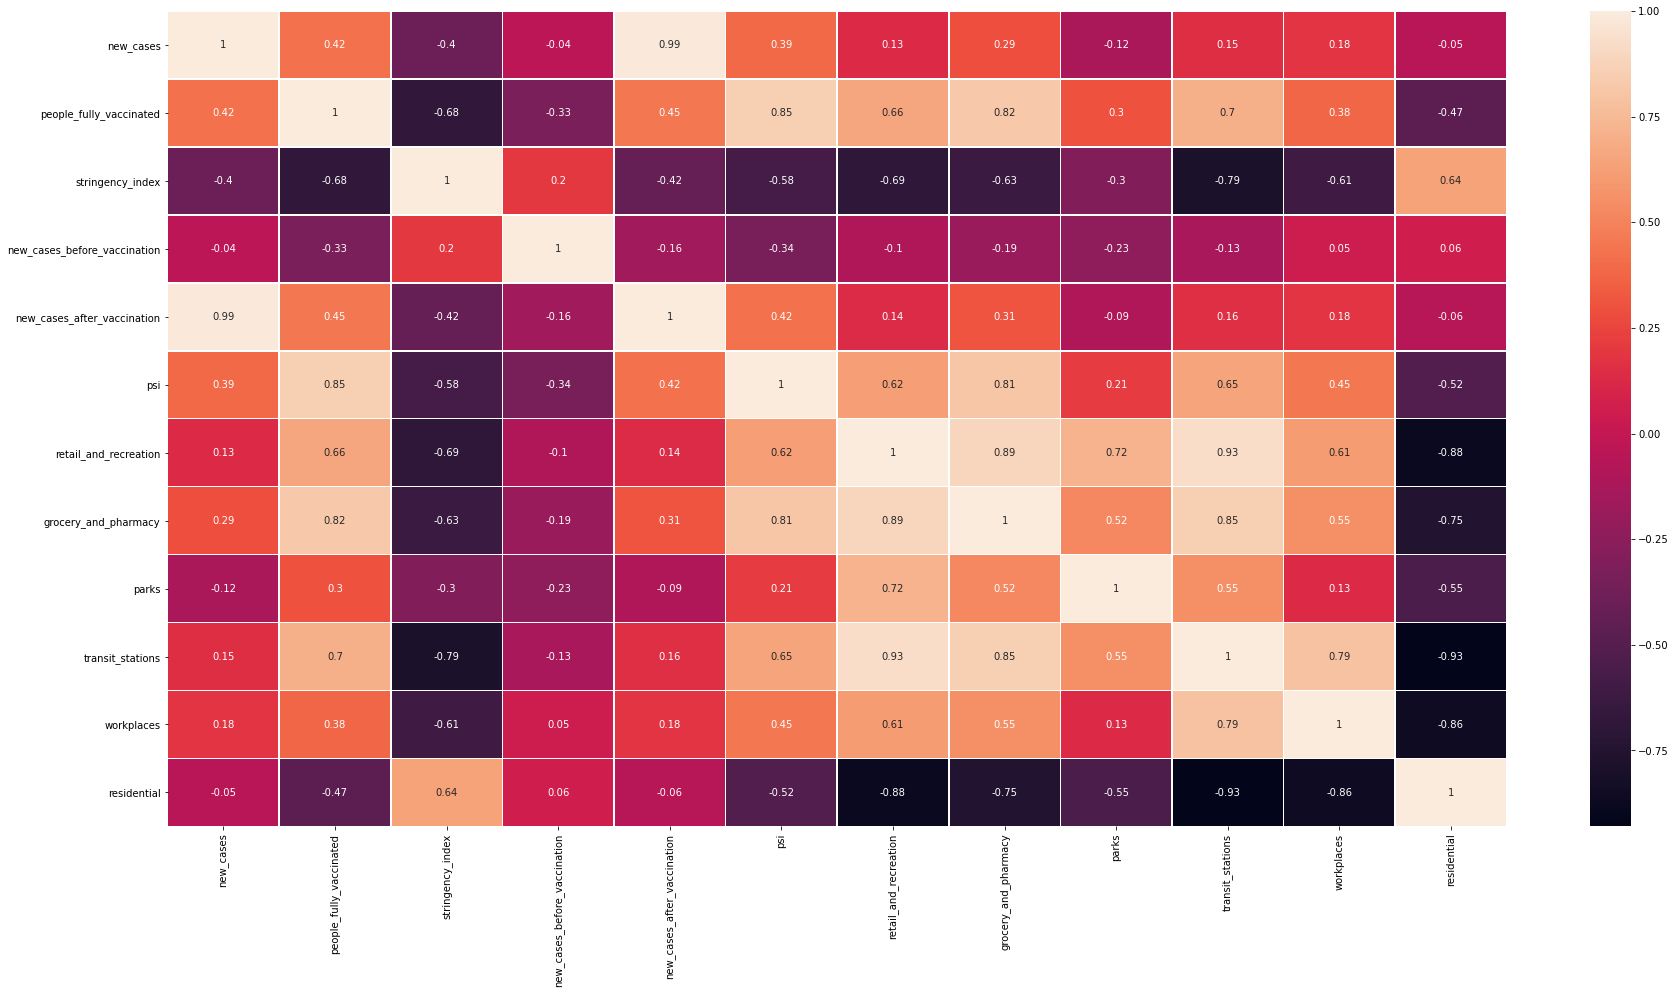

In [11]:
# Data Correlation 

################
### Set correlation DataFrame
################ 
correlation = data.corr()
correlation= correlation.fillna(0)
correlation = round(correlation,2)

################
### Plot correlations
################ 
fig, ax = plt.subplots(figsize=(30,15))       
plot_corr=sns.heatmap(correlation, annot=True, linewidths=.5, ax=ax)

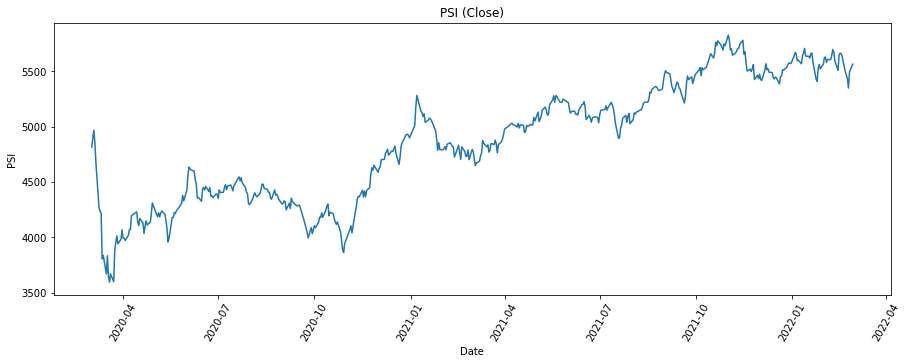

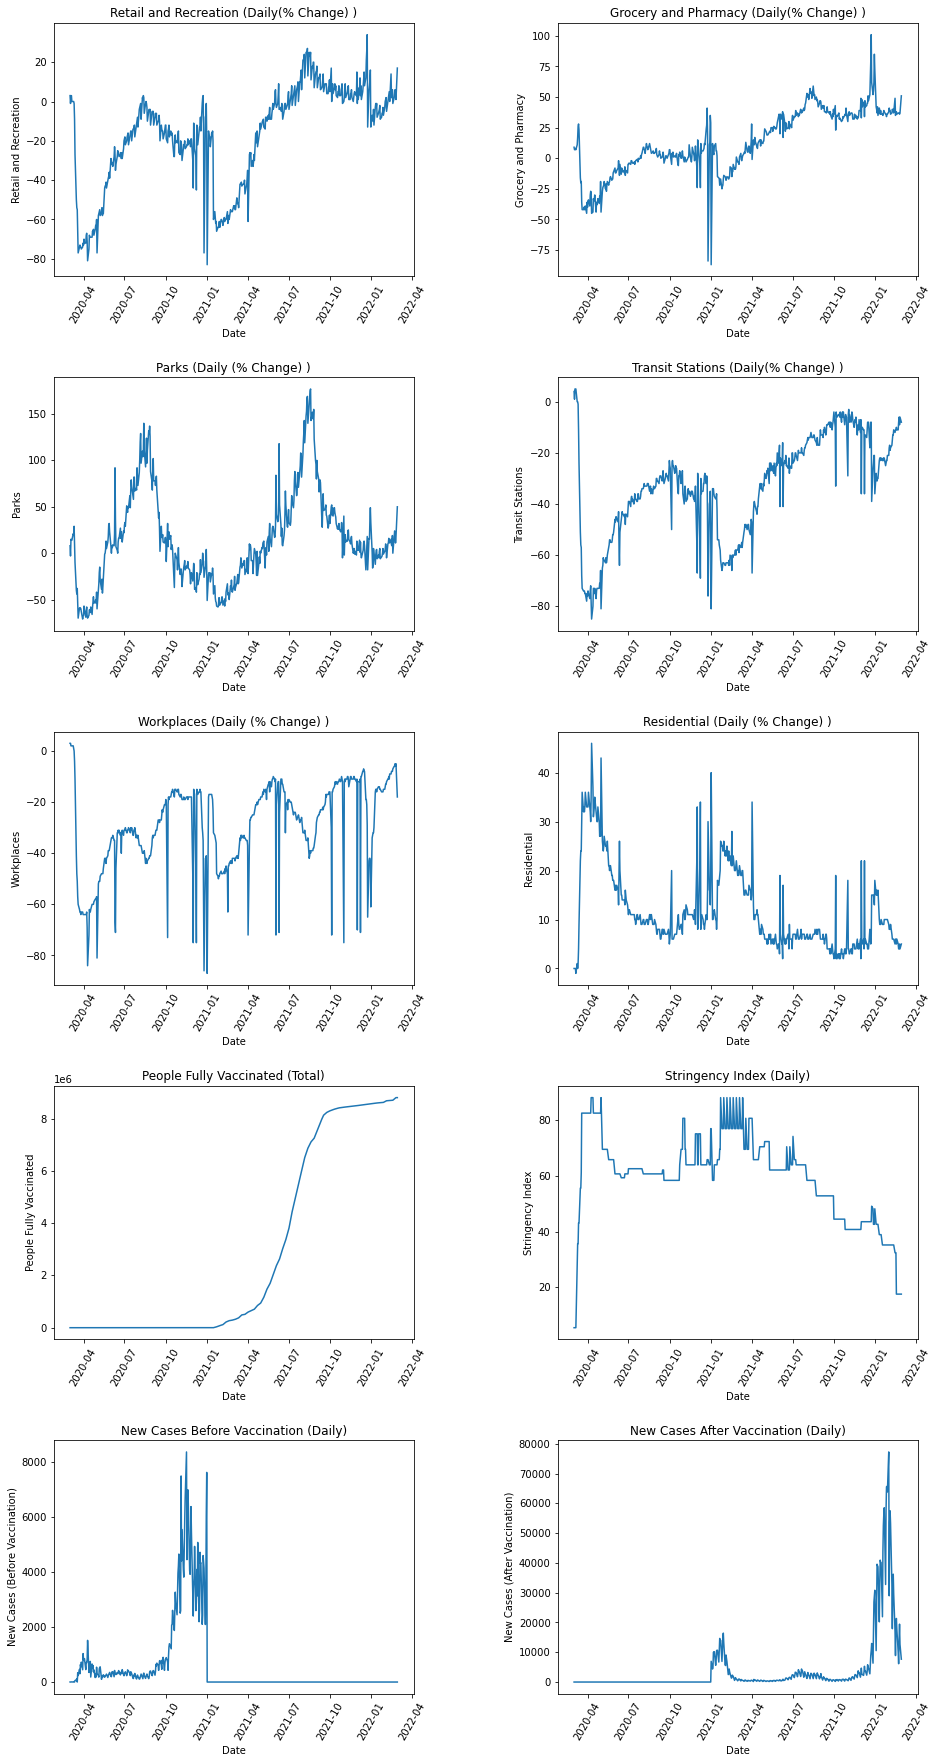

In [12]:
#Plotting Variables

################
### PSI-20
################ 
fig, ax1 = plt.subplots(nrows=1, ncols = 1, figsize=(15,5)) 
ax1.plot(psi['psi'])
ax1.set_title('PSI (Close)')
ax1.set_xlabel('Date')
ax1.set_ylabel('PSI')

################
### Independent Variables
################ 
fig, [[ax2,ax3],[ax4,ax5],[ax6,ax7],[ax8,ax9],[ax10,ax11]] = plt.subplots(nrows=5, ncols = 2, figsize=(15,8)) 

# Mobility
ax2.plot(mobility['retail_and_recreation'])
ax2.set_title('Retail and Recreation (Daily(% Change) )')
ax2.set_xlabel('Date')
ax2.set_ylabel('Retail and Recreation')
ax3.plot(mobility['grocery_and_pharmacy'])
ax3.set_title('Grocery and Pharmacy (Daily(% Change) )')
ax3.set_xlabel('Date')
ax3.set_ylabel('Grocery and Pharmacy')
ax4.plot(mobility['parks'])
ax4.set_title('Parks (Daily (% Change) )')
ax4.set_xlabel('Date')
ax4.set_ylabel('Parks')
ax5.plot(mobility['transit_stations'])
ax5.set_title('Transit Stations (Daily(% Change) )')
ax5.set_xlabel('Date')
ax5.set_ylabel('Transit Stations')
ax6.plot(mobility['workplaces'])
ax6.set_title('Workplaces (Daily (% Change) )')
ax6.set_xlabel('Date')
ax6.set_ylabel('Workplaces')
ax7.plot(mobility['residential'])
ax7.set_title('Residential (Daily (% Change) )')
ax7.set_xlabel('Date')
ax7.set_ylabel('Residential')

# Covid
ax8.plot(covid_data['people_fully_vaccinated'])
ax8.set_title('People Fully Vaccinated (Total)')
ax8.set_xlabel('Date')
ax8.set_ylabel('People Fully Vaccinated')
ax9.plot(covid_data['stringency_index'])
ax9.set_title('Stringency Index (Daily)')
ax9.set_xlabel('Date')
ax9.set_ylabel('Stringency Index')
ax10.plot(covid_data['new_cases_before_vaccination'])
ax10.set_title('New Cases Before Vaccination (Daily)')
ax10.set_xlabel('Date')
ax10.set_ylabel('New Cases (Before Vaccination)')
ax11.plot(covid_data['new_cases_after_vaccination'])
ax11.set_title('New Cases After Vaccination (Daily)')
ax11.set_xlabel('Date')
ax11.set_ylabel('New Cases (After Vaccination)')

################
### Figure parameters
################ 
plt.subplots_adjust(left=0.1,
                    bottom=-2, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

ax1.tick_params(axis='x', rotation=60)
ax2.tick_params(axis='x', rotation=60)
ax3.tick_params(axis='x', rotation=60)
ax4.tick_params(axis='x', rotation=60)
ax5.tick_params(axis='x', rotation=60)
ax6.tick_params(axis='x', rotation=60)
ax7.tick_params(axis='x', rotation=60)
ax8.tick_params(axis='x', rotation=60)
ax9.tick_params(axis='x', rotation=60)
ax10.tick_params(axis='x', rotation=60)
ax11.tick_params(axis='x', rotation=60)

In [26]:
# VIF independent variables
y= data['psi']
x = data[['retail_and_recreation','grocery_and_pharmacy','parks','transit_stations','workplaces','residential','people_fully_vaccinated','stringency_index','new_cases_before_vaccination','new_cases_after_vaccination']]

x_temp = sm.add_constant(x)

vif_data = pd.DataFrame()
vif_data["feature"] = x_temp.columns
vif_data["VIF"] = [variance_inflation_factor(x_temp.values, i)
                          for i in range(len(x_temp.columns))]

print("\n\033[1mVIF (Variance Inflation Factors):\033[0m")
display(vif_data)


VIF (Variance Inflation Factors):


,feature,VIF
0,const,1.000000
1,retail_and_recreation,27.238731
2,grocery_and_pharmacy,11.677101
3,parks,5.965109
4,transit_stations,50.270912
5,workplaces,14.417332
6,residential,36.323946
7,people_fully_vaccinated,8.171560
8,stringency_index,5.268427
9,new_cases_before_vaccination,1.558996



Parallel analysis suggests that the number of components : 3

Cumulative Explained Variance of the components: [ 57.72329121  72.02800795  83.97920328  90.68145426  95.0572734
  98.32728446  99.30026015  99.63359416  99.85550931 100.        ] 



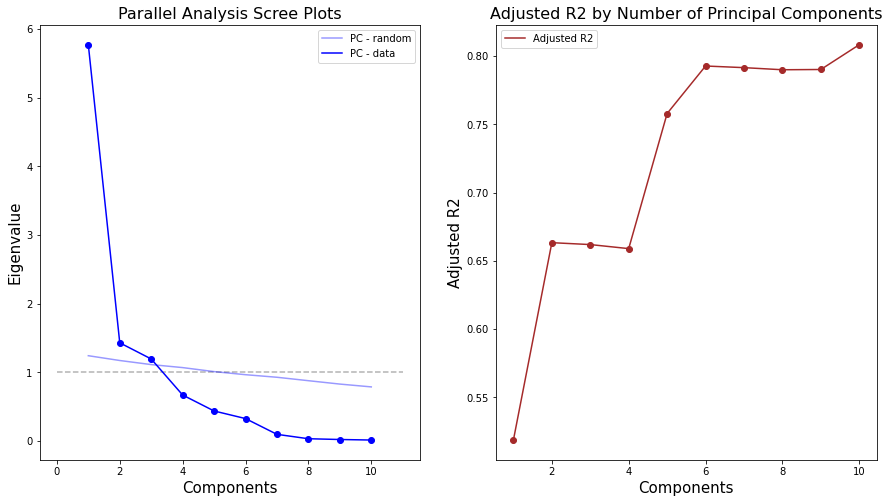

In [13]:
# Parallel Analysis and Adj R2 by number of components

y= data['psi']
x = data[['retail_and_recreation','grocery_and_pharmacy','parks','transit_stations','workplaces','residential','people_fully_vaccinated','stringency_index','new_cases_before_vaccination','new_cases_after_vaccination']]

def _ChooseComponents(data,y, K=10, printEigenvalues=False):
    ################
    # Create a random matrix to match the dataset
    ################
    n, m = data.shape
    # Set the factor analysis parameters
    fa = FactorAnalyzer(n_factors=1, method='minres', rotation=None, use_smc=True)
    # Create arrays to store the values
    sumComponentEigens = np.empty(m)
    # Run the fit 'K' times over a random matrix
    for runNum in range(0, K):
        fa.fit(np.random.normal(size=(n, m)))
        sumComponentEigens = sumComponentEigens + fa.get_eigenvalues()[0]
    # Average over the number of runs
    avgComponentEigens = sumComponentEigens / K

    ################
    # Get the eigenvalues for the fit on supplied data
    ################
    fa.fit(data)
    dataEv = fa.get_eigenvalues()
    # Set up a scree plot
    fig, [ax1,ax2] = plt.subplots(nrows=1, ncols = 2, figsize=(15,8))
    ################
    ### Print results
    ################
    if printEigenvalues:
        print('\n\033[1mPrincipal component eigenvalues for random matrix:\033[0m\n', avgComponentEigens)
        print('\n\033[1mPrincipal component eigenvalues for data:\033[0m\n', dataEv[0])
    # Find the suggested stopping points
    suggestedComponents = sum((dataEv[0] - avgComponentEigens) > 0)
    print('\n\033[1mParallel analysis suggests that the number of components :\033[0m', suggestedComponents)

    ################
    ### Plot the eigenvalues against the number of variables
    ################
    # Line for eigenvalue 1
    ax1.plot([0, m+1], [1, 1], 'k--', alpha=0.3)
    # For the random data - Components
    ax1.plot(range(1, m+1), avgComponentEigens, 'b', label='PC - random', alpha=0.4)
    # For the Data - Components
    ax1.scatter(range(1, m+1), dataEv[0], c='b', marker='o')
    ax1.plot(range(1, m+1), dataEv[0], 'b', label='PC - data')
    ax1.set_title('Parallel Analysis Scree Plots', {'fontsize': 16})
    ax1.set_xlabel('Components', {'fontsize': 15})
    ax1.set_ylabel('Eigenvalue', {'fontsize': 15})
    ax1.legend()

    ################
    ### Fit PCA
    ################
    pca = PCA()
    X_reduced = pca.fit_transform(x)
    
    ################
    ### Cross Validation Method
    ################
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=8)
    regr = LinearRegression()

    ################
    ### Adj R2 by number of componentes
    ################
    adjr2 = []
    for i in np.arange(1, len(x.columns)+1):
        score = model_selection.cross_val_score(regr,
                   X_reduced[:,:i], y, cv=cv, scoring='r2').mean()
        adjr2.append(1 - (1-score) * (len(y)-1)/(len(y)-i-1))
    adjr2 = pd.DataFrame(adjr2)
    adjr2['components'] = np.arange(1,len(x.columns)+1)
    adjr2 = adjr2.set_index('components')
    
    ################
    ### Plot cross-validation results 
    ################   
    ax2.scatter(range(1, m+1),adjr2, c='brown', marker='o')
    ax2.plot(range(1, m+1),adjr2, 'brown', label='Adjusted R2')
    ax2.set_title('Adjusted R2 by Number of Principal Components', {'fontsize': 16})
    ax2.set_xlabel('Components', {'fontsize': 15})
    ax2.set_ylabel('Adjusted R2', {'fontsize': 15})
    ax2.legend()
    
    ################
    ### Cumulative Explained Variance of the components 
    ################
    explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_*100)
    print("\n\033[1mCumulative Explained Variance of the components:\033[0m", explained_variance_ratio, "\n")

_ChooseComponents(x,y)


Eigenvectors


,PC1,PC2,PC3
variable,,,
retail_and_recreation,-0.393578,-0.161562,-0.114576
grocery_and_pharmacy,-0.378483,0.067790,-0.075158
parks,-0.242633,-0.260971,-0.574672
transit_stations,-0.406276,-0.122517,0.055678
workplaces,-0.307491,-0.166937,0.449257
residential,0.374675,0.284395,-0.090821
people_fully_vaccinated,-0.322626,0.373601,-0.063542
stringency_index,0.339523,-0.205907,-0.165916
new_cases_before_vaccination,0.089203,-0.418375,0.577173



Loadings


,PC1,PC2,PC3
variable,,,
retail_and_recreation,-0.946536,-0.193424,-0.125381
grocery_and_pharmacy,-0.910235,0.081159,-0.082245
parks,-0.583520,-0.312437,-0.628865
transit_stations,-0.977076,-0.146678,0.060928
workplaces,-0.739501,-0.199859,0.491622
residential,0.901077,0.340481,-0.099385
people_fully_vaccinated,-0.775901,0.447279,-0.069534
stringency_index,0.816538,-0.246514,-0.181562
new_cases_before_vaccination,0.214530,-0.500883,0.631601


      
OLS Model
                            OLS Regression Results                            
Dep. Variable:                    psi   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     289.2
Date:                Tue, 27 Sep 2022   Prob (F-statistic):           1.10e-99
Time:                        17:24:05   Log-Likelihood:                -338.75
No. Observations:                 403   AIC:                             685.5
Df Residuals:                     399   BIC:                             701.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0040      0.028   

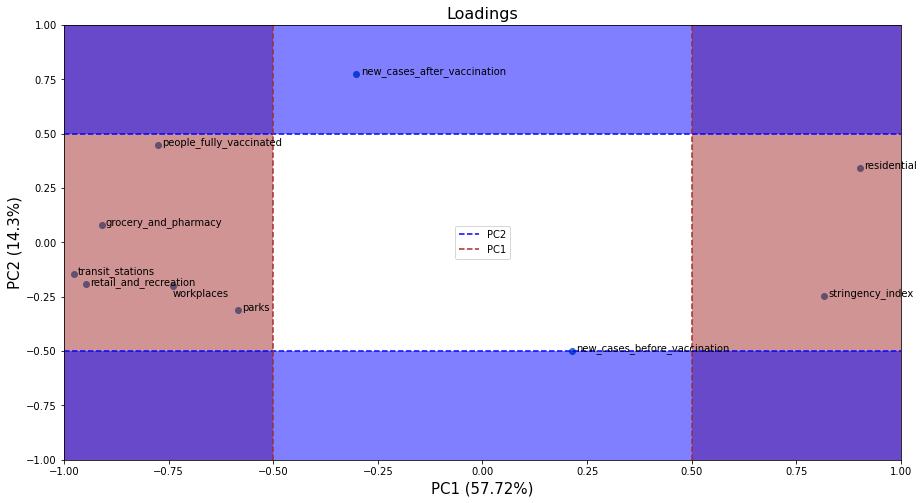

In [35]:
# Principal Component Analysis and Model Validation

################
### Data
################ 
y= data['psi']
x = data[['retail_and_recreation','grocery_and_pharmacy','parks','transit_stations','workplaces','residential','people_fully_vaccinated','stringency_index','new_cases_before_vaccination','new_cases_after_vaccination']]

################
### Principal Component Analysis
################ 

# PCA with the number of components selected and eigenvectors
pca = PCA(n_components = 3)
pca.fit(x)
num_pc = pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
eigenvectors = pd.DataFrame.from_dict(dict(zip(pc_list, pca.components_)))
eigenvectors['variable'] = x.columns.values
eigenvectors = eigenvectors.set_index('variable')
print("\n\033[1mEigenvectors\033[0m")
display(eigenvectors)


# Correlation between eigenvectors and components - Loadings
correlation_loadings_PC = pca.components_.T * np.sqrt(pca.explained_variance_)
num_pc = pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
correlation_loadings = pd.DataFrame.from_dict(dict(zip(pc_list,correlation_loadings_PC.T)))
correlation_loadings['variable'] = x.columns.values
correlation_loadings = correlation_loadings.set_index('variable')
print("\n\033[1mLoadings\033[0m")
display(correlation_loadings)

################
### Model Validation
################

# Split train and test data
x_reduced = pd.DataFrame(pca.transform(x),columns = loadings.columns).set_index(x.index)
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(x_reduced, y, test_size = 0.20,random_state=8) 

# Model and Prediction
model_ols = sm.OLS(Y_train, sm.add_constant(X_train)).fit()
print(" "* 5,"\n\033[1mOLS Model\033[0m")
print(model_ols.summary())
Y_test_pred_ols = model_ols.predict(sm.add_constant(X_test))

# Adj R2 Score before removing non significant variables
r2 = skl.r2_score(Y_test, Y_test_pred_ols)
adj_r2 = 1 - (1-r2) * (len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)
print("\n\033[1mAdj R2 Score before removing not significant variables\033[0m")
print("R2 Score:" , adj_r2)

# Split train and test data without the component number 3
pca = PCA(n_components = 2)
pca.fit(x)
x_reduced = pd.DataFrame(pca.transform(x),columns = loadings[['PC1','PC2']].columns).set_index(x.index)
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(x_reduced, y, test_size = 0.20,random_state=8)

# Model and Prediction after removing non significant variables
model_ols = sm.OLS(Y_train, sm.add_constant(X_train)).fit()
print(" "* 5,"\n\033[1mOLS Model\033[0m")
print(model_ols.summary())
Y_test_pred_ols = model_ols.predict(sm.add_constant(X_test))

# Adj R2 Score after removing non significant variables
r2 = skl.r2_score(Y_test, Y_test_pred_ols)
adj_r2 = 1 - (1-r2) * (len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)
print("\n\033[1mAdj R2 Score after removing not significant variables\033[0m")
print("R2 Score:" , adj_r2)

### Adjusted R2 increases, so the PC3 is removed

################
### Plot Correlations of variables with the components
################ 
fig, ax = plt.subplots(figsize=(15,8))
ax.scatter(correlation_loadings[['PC1']],correlation_loadings[['PC2']])
ax.set_title('Loadings',{'fontsize': 16})
ax.set_xlabel('PC1 ('+ str(round(pca.explained_variance_ratio_[0]*100, 2)) + '%)' ,{'fontsize': 15})
ax.set_ylabel('PC2 ('+ str(round(pca.explained_variance_ratio_[1]*100, 2)) + '%)' ,{'fontsize': 15})
ax.set_xlim(left=-1,right=1)
ax.set_ylim(bottom=-1,top=1)
ax.hlines(y=0.5, xmin=-1, xmax=1, linestyle = 'dashed', color='blue',label='PC2')
ax.vlines(x=0.5, ymin=-1, ymax=1, linestyle = 'dashed', color='brown',label ='PC1')
ax.hlines(y=-0.5, xmin=-1, xmax=1, linestyle = 'dashed', color='blue')
ax.vlines(x=-0.5, ymin=-1, ymax=1, linestyle = 'dashed', color='brown')
ax.axvspan(-1, -0.5, facecolor='brown', alpha=0.5)
ax.axvspan(0.5, 1, facecolor='brown', alpha=0.5)
ax.axhspan(0.5, 1, facecolor='blue', alpha=0.5)
ax.axhspan(-1, -0.5, facecolor='blue', alpha=0.5)
ax.legend()
variables = correlation_loadings.index.to_list()
pc1 = correlation_loadings['PC1'].to_list()
pc2 = correlation_loadings['PC2'].to_list()
for i, txt in enumerate(variables):
    if txt == 'workplaces':
        ax.annotate(txt, (pc1[i], pc2[i]-0.05))
    else:
        ax.annotate(txt, (pc1[i]+0.01, pc2[i]))
    

      
OLS Model
                            OLS Regression Results                            
Dep. Variable:                    psi   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     434.8
Date:                Tue, 27 Sep 2022   Prob (F-statistic):          4.70e-101
Time:                        13:39:32   Log-Likelihood:                -338.75
No. Observations:                 403   AIC:                             683.5
Df Residuals:                     400   BIC:                             695.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0040      0.028   

,Date,Residuals,mean
0,2021-12-10,0.238363,-0.020071
1,2021-05-04,0.486143,-0.020071
2,2021-03-23,0.499810,-0.020071
3,2020-11-13,0.119085,-0.020071
4,2020-08-20,-0.610225,-0.020071
...,...,...,...
96,2021-07-01,0.162654,-0.020071
97,2021-06-25,0.324994,-0.020071
98,2021-09-07,0.355311,-0.020071
99,2020-11-20,0.207396,-0.020071


------------------------------------------------------------------------------------------------------------------------

Durbin-Watson Test for Residuals: 1.635185245141636


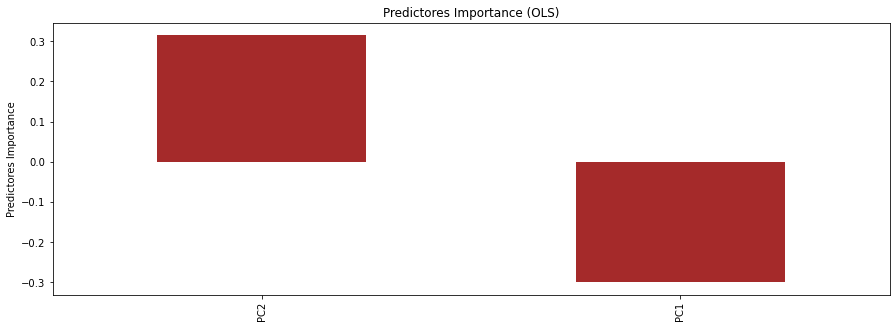

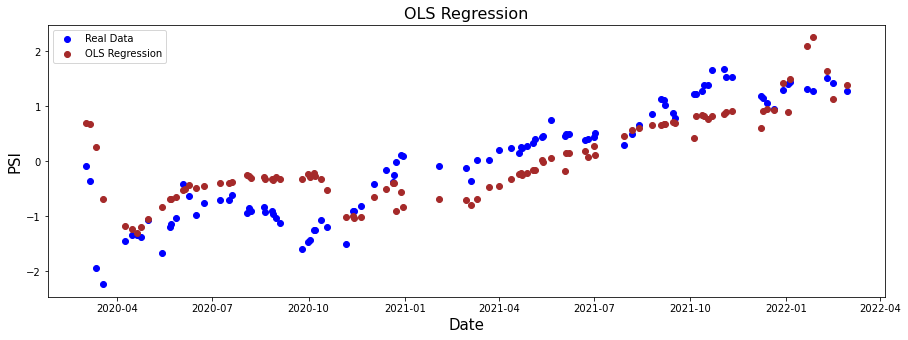

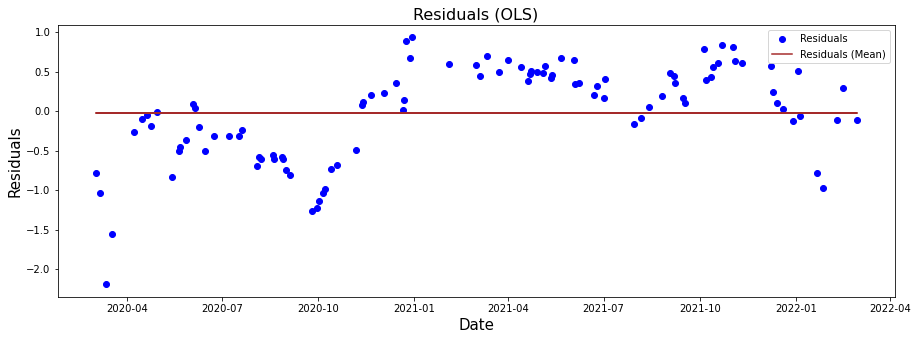

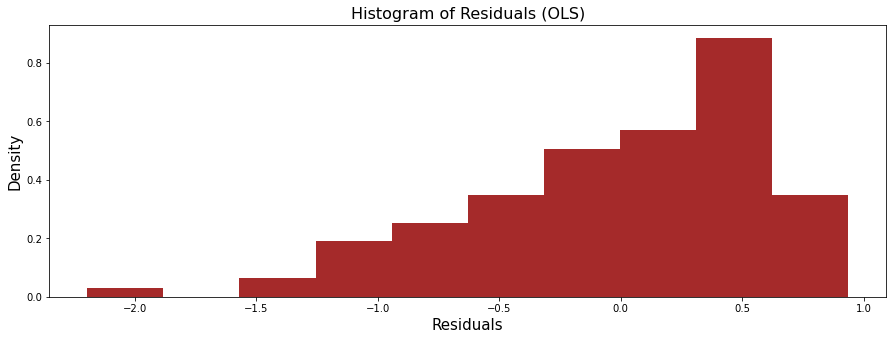

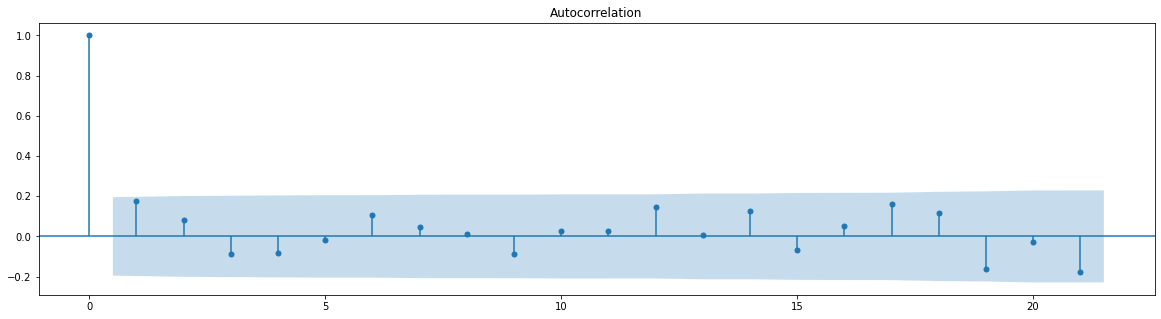

In [15]:
# OLS Regression

################
### Fit Model
################ 
model_ols = sm.OLS(Y_train, sm.add_constant(X_train)).fit()
print(" "* 5,"\n\033[1mOLS Model\033[0m")
print(model_ols.summary())

################
### Prediction
################ 
Y_test_pred_ols = model_ols.predict(sm.add_constant(X_test))
predictors_ols=list(X_train)
fig, ax = plt.subplots(figsize=(15,5))
pred_importance_ols= pd.Series(model_ols.params, predictors_ols).sort_values(ascending=False)
pred_importance_ols.plot.bar( color = 'brown')
plt.ylabel('Predictores Importance')
plt.title('Predictores Importance (OLS)')

################
### Plot Y predict vs Y real
################ 
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(Y_test, 'o', c='b', label="Real Data")
ax.plot(Y_test_pred_ols, 'o', c='brown', label="OLS Regression")
ax.set_title('OLS Regression',{'fontsize': 16})
ax.set_xlabel('Date', {'fontsize': 15})
ax.set_ylabel('PSI', {'fontsize': 15})
ax.legend()

################
### Residuals
################ 

# Residuals
residuals_ols_df = pd.DataFrame(Y_test.values - Y_test_pred_ols.values)
residuals_ols_df.rename(columns = {0:'Residuals'}, inplace = True)
residuals_ols_df.index = Y_test.index
residuals_ols_df = residuals_ols_df.reset_index()
residuals_ols_df['mean'] = residuals_ols_df['Residuals'].mean()
print(" "* 5,"\n\033[1mResiduals\033[0m")
display(residuals_ols_df)

# PLotting
fig,ax = plt.subplots(figsize=(15,5))
ax.plot(residuals_ols_df['Date'],residuals_ols_df['Residuals'], 'o', c='b', label='Residuals')
ax.plot(residuals_ols_df['Date'],residuals_ols_df['mean'], c='brown', label='Residuals (Mean)')
ax.set_title('Residuals (OLS)',{'fontsize': 16})
ax.set_xlabel('Date',{'fontsize': 15})
ax.set_ylabel('Residuals',{'fontsize': 15})
ax.legend()
fig,ax = plt.subplots(figsize=(15,5))
ax.hist(residuals_ols_df['Residuals'],color = 'brown',density = True)
ax.set_title('Histogram of Residuals (OLS)',{'fontsize': 16})
ax.set_xlabel('Residuals',{'fontsize': 15})
ax.set_ylabel('Density',{'fontsize': 15})

# ACF of Residuals
plt.figure(figsize=(20,5))
acf =plot_acf(residuals_ols_df['Residuals'], ax=plt.gca())

# Durbin Watson Test
print("-"*120)
print("\n\033[1mDurbin-Watson Test for Residuals:\033[0m",durbin_watson(Y_test.values - Y_test_pred_ols.values))




Optimal Alpha (Ridge): 0.01
------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------
      
Ridge Model


,PC1,PC2
Coefficients,,
Coefficients,-0.299389,0.315198


------------------------------------------------------------------------------------------------------------------------
      
Residuals


,Date,Residuals,mean
0,2021-12-10,0.238369,-0.020072
1,2021-05-04,0.486139,-0.020072
2,2021-03-23,0.499809,-0.020072
3,2020-11-13,0.119071,-0.020072
4,2020-08-20,-0.610230,-0.020072
...,...,...,...
96,2021-07-01,0.162653,-0.020072
97,2021-06-25,0.324992,-0.020072
98,2021-09-07,0.355313,-0.020072
99,2020-11-20,0.207382,-0.020072


------------------------------------------------------------------------------------------------------------------------

Durbin-Watson Test for Residuals: [1.63518703]


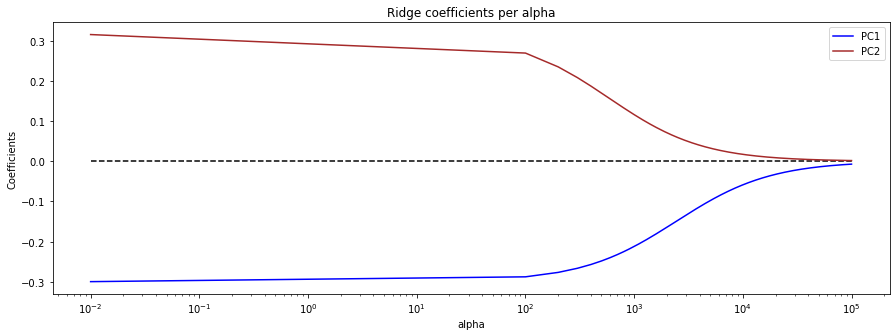

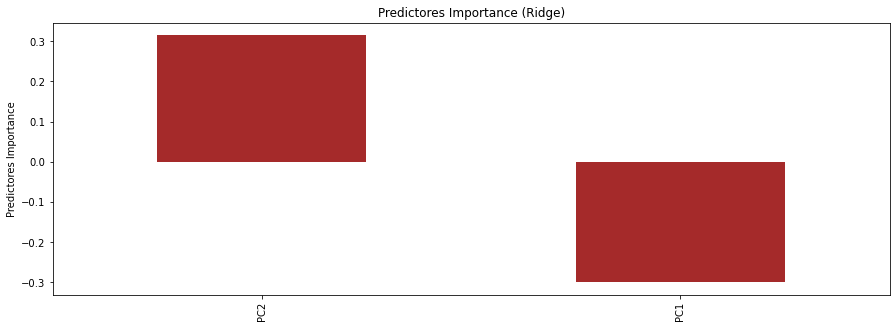

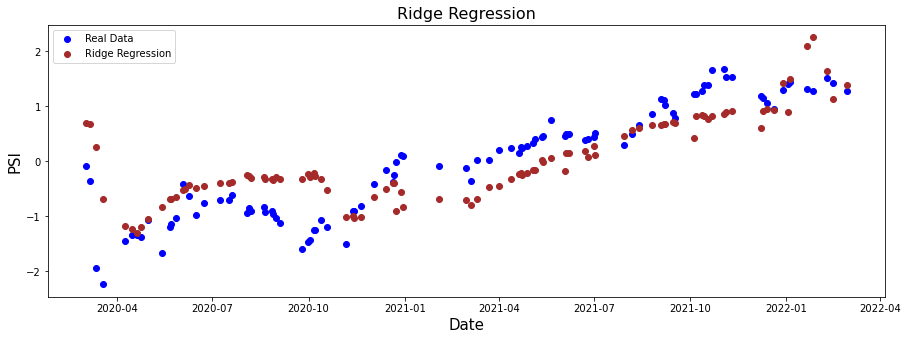

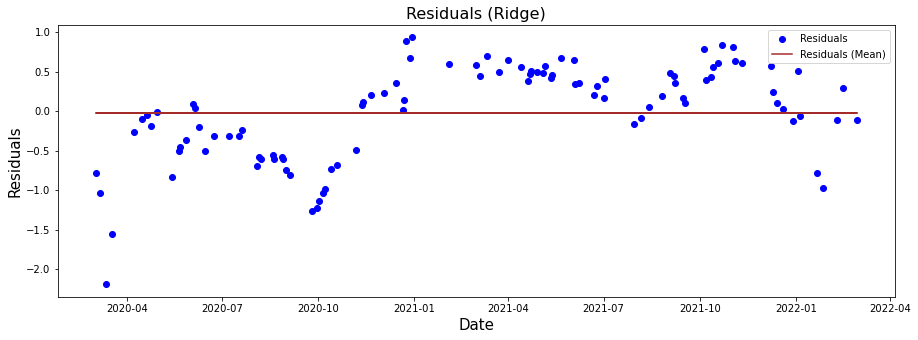

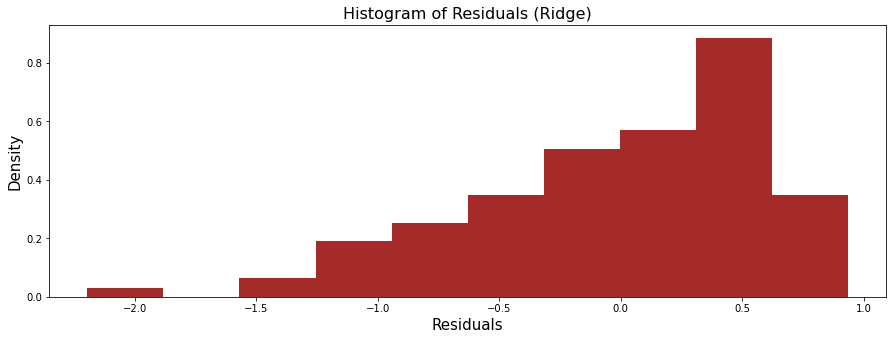

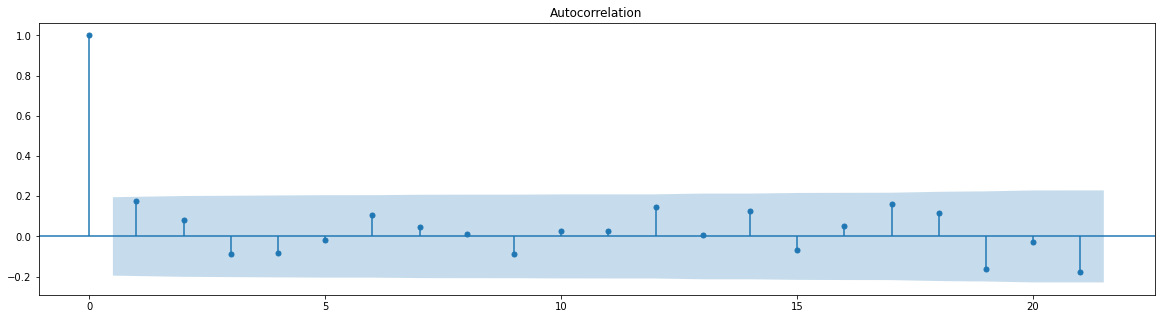

In [17]:
# Ridge Regression

################
### Optimal Parameters
################ 
alphas_Ridge = np.linspace(0.01,100000,1000)
model_alpha_Ridge = Ridge(max_iter=10000)
coefs_alpha_Ridge = []

for i in alphas_Ridge:
    model_alpha_Ridge.set_params(alpha=i)
    model_alpha_Ridge.fit(X_train, Y_train)
    coefs_alpha_Ridge.append(model_alpha_Ridge.coef_)

# Plot convergency of coefficients with the increase of alpha
fig,ax = plt.subplots(figsize=(15,5))
ax.plot(alphas_Ridge,[item[0] for item in coefs_alpha_Ridge],label='PC1',color='blue')
ax.plot(alphas_Ridge,[item[1] for item in coefs_alpha_Ridge],label='PC2',color='brown')
ax.hlines(y=0, xmin=0.01, xmax=100000, linestyle = 'dashed', color='black')
ax.set_xscale('log')
ax.set_title('Ridge coefficients per alpha')
ax.set_xlabel('alpha')
ax.set_ylabel('Coefficients')
ax.legend()

# Find optimal alpha's
model_alpha_Ridge = RidgeCV(cv=5, alphas = alphas_Ridge)
model_alpha_Ridge.fit(X_train, Y_train)
opt_alpha_Ridge = model_alpha_Ridge.alpha_
print("\n\033[1mOptimal Alpha (Ridge):\033[0m", opt_alpha_Ridge)
print("-"*120)
print("-"*120)

################
### Fit Model
################ 
model_Ridge = Ridge(alpha = opt_alpha_Ridge)
model_Ridge_fit = model_Ridge.fit(X_train,Y_train)
coefs_Ridge = []
coefs_Ridge.append(model_Ridge.coef_)
coefs_Ridge_df = pd.DataFrame(coefs_Ridge)
coefs_Ridge_df.rename(columns = {0:'PC1',1:'PC2'}, inplace = True)
coefs_Ridge_df['Coefficients'] = 'Coefficients'
coefs_Ridge_df.set_index('Coefficients', inplace = True)
coefs_Ridge_df = coefs_Ridge_df.style.set_properties(**{'text-align': 'center'})
print(" "* 5,"\n\033[1mRidge Model\033[0m")
with pd.option_context('expand_frame_repr', False):
    display(coefs_Ridge_df)
    print("-"*120)
    
################
### Prediction
################  
Y_test_pred_Ridge = model_Ridge.predict(X_test)
Y_test_pred_Ridge = pd.DataFrame(Y_test_pred_Ridge)
Y_test_pred_Ridge.rename(columns = {0: 'Ridge Regression'}, inplace = True)
Y_test = Y_test.reset_index()
Y_test_pred_Ridge['Date'] = Y_test['Date']
Y_test_pred_Ridge.set_index('Date', inplace=True)
Y_test.set_index('Date', inplace=True)
predictors_Ridge=list(X_train)
fig, ax = plt.subplots(figsize=(15,5))
pred_importance_Ridge= pd.Series(model_Ridge.coef_, predictors_Ridge).sort_values(ascending=False)
pred_importance_Ridge.plot.bar( color = 'brown')
plt.ylabel('Predictores Importance')
plt.title('Predictores Importance (Ridge)')

################
### Plot Y predict vs Y real
################ 
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(Y_test, 'o', c='b', label="Real Data")
ax.plot(Y_test_pred_Ridge, 'o', c='brown', label="Ridge Regression")
ax.set_title('Ridge Regression',{'fontsize': 16})
ax.set_xlabel('Date', {'fontsize': 15})
ax.set_ylabel('PSI', {'fontsize': 15})
ax.legend()

################
### Residuals
################ 

# Residuals
residuals_Ridge_df = pd.DataFrame(Y_test.values - Y_test_pred_Ridge.values,columns=Y_test.columns)
residuals_Ridge_df.rename(columns = {'psi':'Residuals'}, inplace = True)
residuals_Ridge_df.index = Y_test.index
residuals_Ridge_df = residuals_Ridge_df.reset_index()
residuals_Ridge_df['mean'] = residuals_Ridge_df['Residuals'].mean()
print(" "* 5,"\n\033[1mResiduals\033[0m")
display(residuals_Ridge_df)

# Plotting
fig,ax = plt.subplots(figsize=(15,5))
ax.plot(residuals_Ridge_df['Date'],residuals_Ridge_df['Residuals'], 'o', c='b', label='Residuals')
ax.plot(residuals_Ridge_df['Date'],residuals_Ridge_df['mean'], c='brown', label='Residuals (Mean)')
ax.set_title('Residuals (Ridge)',{'fontsize': 16})
ax.set_xlabel('Date',{'fontsize': 15})
ax.set_ylabel('Residuals',{'fontsize': 15})
ax.legend()
fig,ax = plt.subplots(figsize=(15,5))
ax.hist(residuals_Ridge_df['Residuals'],color = 'brown',density = True)
ax.set_title('Histogram of Residuals (Ridge)',{'fontsize': 16})
ax.set_xlabel('Residuals',{'fontsize': 15})
ax.set_ylabel('Density',{'fontsize': 15})

# ACF of Residuals
plt.figure(figsize=(20,5))
acf =plot_acf(residuals_Ridge_df['Residuals'], ax=plt.gca())

# Durbin Watson Test
print("-"*120)
print("\n\033[1mDurbin-Watson Test for Residuals:\033[0m",durbin_watson(Y_test.values - Y_test_pred_Ridge.values))



Optimal Alpha (Lasso): 0.0018092989327430178
------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------
      
Lasso Model


,PC1,PC2
Coefficients,,
Coefficients,-0.299087,0.313958


------------------------------------------------------------------------------------------------------------------------
      
Residuals


,Date,Residuals,mean
0,2021-12-10,0.239723,-0.02024
1,2021-05-04,0.485285,-0.02024
2,2021-03-23,0.499434,-0.02024
3,2020-11-13,0.115848,-0.02024
4,2020-08-20,-0.611355,-0.02024
...,...,...,...
96,2021-07-01,0.162439,-0.02024
97,2021-06-25,0.324462,-0.02024
98,2021-09-07,0.355870,-0.02024
99,2020-11-20,0.204184,-0.02024


------------------------------------------------------------------------------------------------------------------------

Durbin-Watson Test for Residuals: [1.63561428]


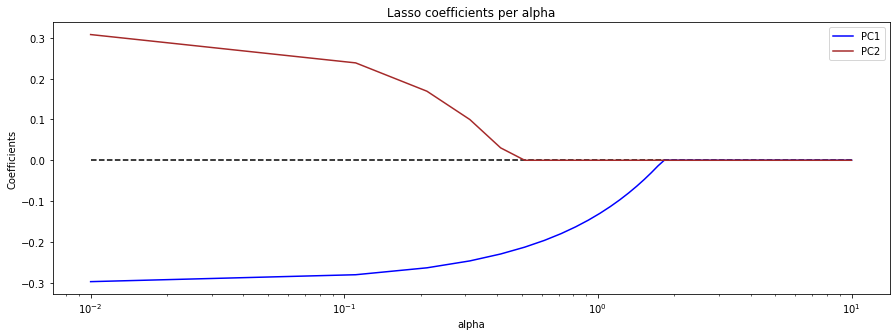

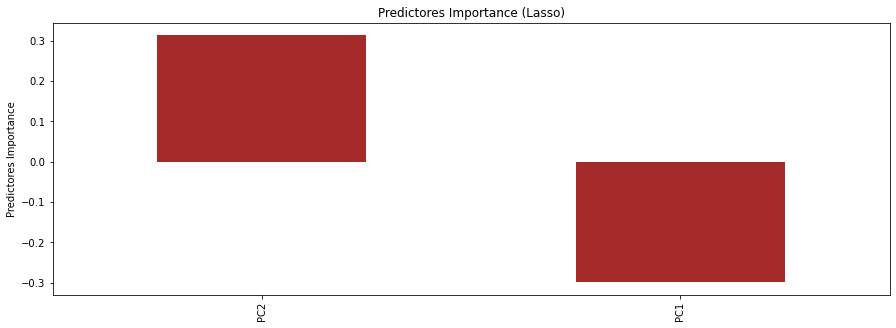

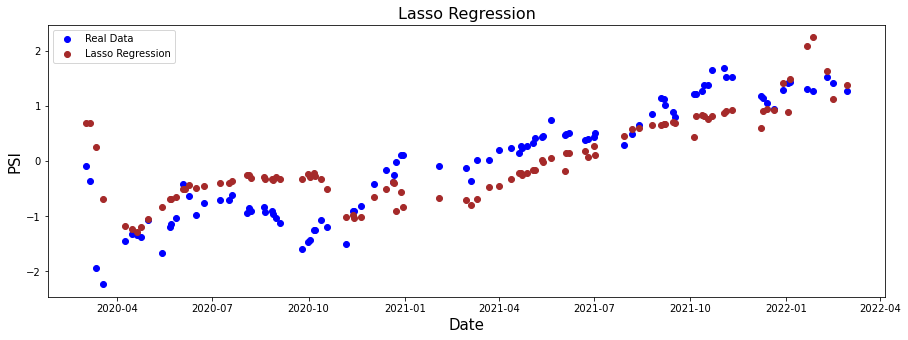

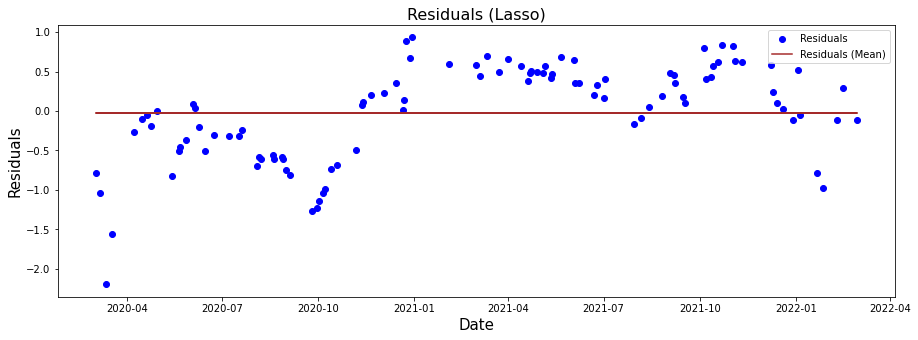

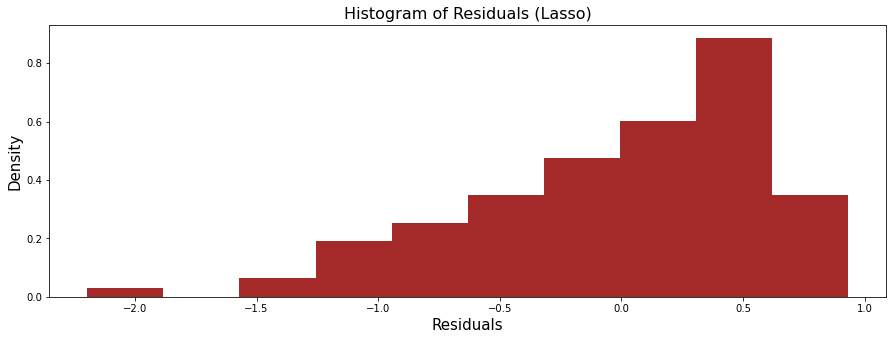

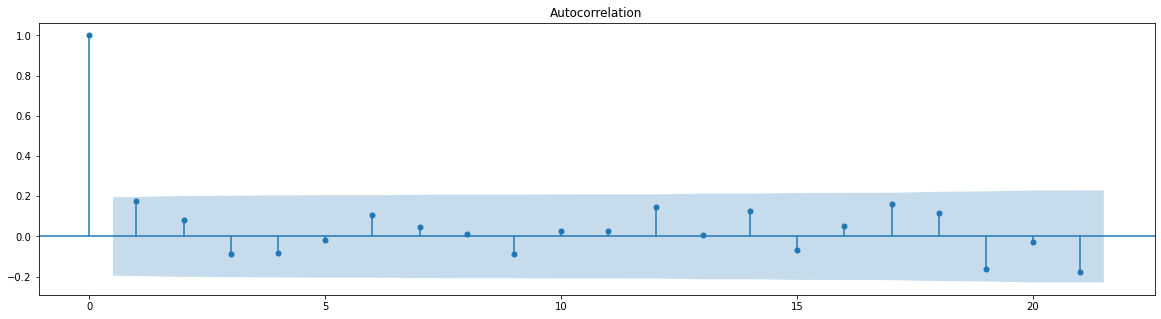

In [18]:
# Lasso Regression

################
### Optimal Alpha
################ 
alphas_Lasso = np.linspace(0.01,10,100)
model_alpha_Lasso = Lasso(max_iter=10000)
coefs_alpha_Lasso = []

for i in alphas_Lasso:
    model_alpha_Lasso.set_params(alpha=i)
    model_alpha_Lasso.fit(X_train, Y_train)
    coefs_alpha_Lasso.append(model_alpha_Lasso.coef_)

# Plot convergency of coefficients with the increase of alpha
fig,ax = plt.subplots(figsize=(15,5))
ax.plot(alphas_Lasso,[item[0] for item in coefs_alpha_Lasso],label='PC1',color='blue')
ax.plot(alphas_Lasso,[item[1] for item in coefs_alpha_Lasso],label='PC2',color='brown')
ax.hlines(y=0, xmin=0.01, xmax=10, linestyle = 'dashed', color='black')
ax.set_xscale('log')
ax.set_title('Lasso coefficients per alpha')
ax.set_xlabel('alpha')
ax.set_ylabel('Coefficients')
ax.legend()

# Find optimal alpha's
model_alpha_Lasso = LassoCV(cv=5, random_state=8, max_iter=10000)
model_alpha_Lasso.fit(X_train, Y_train)
opt_alpha_Lasso = model_alpha_Lasso.alpha_
print("\n\033[1mOptimal Alpha (Lasso):\033[0m", opt_alpha_Lasso)
print("-"*120)
print("-"*120)

################
### Fit Model
################ 
model_Lasso = Lasso(alpha = opt_alpha_Lasso)
model_Lasso_fit = model_Lasso.fit(X_train,Y_train)
coefs_Lasso = []
coefs_Lasso.append(model_Lasso.coef_)
coefs_Lasso_df = pd.DataFrame(coefs_Lasso)
coefs_Lasso_df.rename(columns = {0:'PC1',1:'PC2'}, inplace = True)
coefs_Lasso_df['Coefficients'] = 'Coefficients'
coefs_Lasso_df.set_index('Coefficients', inplace = True)
coefs_Lasso_df = coefs_Lasso_df.style.set_properties(**{'text-align': 'center'})
print(" "* 5,"\n\033[1mLasso Model\033[0m")
with pd.option_context('expand_frame_repr', False):
    display(coefs_Lasso_df)
    print("-"*120)

################
### Prediction
################ 
Y_test_pred_Lasso = model_Lasso.predict(X_test)
Y_test_pred_Lasso = pd.DataFrame(Y_test_pred_Lasso)
Y_test_pred_Lasso.rename(columns = {0: 'Lasso Regression'}, inplace = True)
Y_test = Y_test.reset_index()
Y_test_pred_Lasso['Date'] = Y_test['Date']
Y_test_pred_Lasso.set_index('Date', inplace=True)
Y_test.set_index('Date', inplace=True)
predictors_Lasso=list(X_train)
fig, ax = plt.subplots(figsize=(15,5))
pred_importance_Lasso= pd.Series(model_Lasso.coef_, predictors_Lasso).sort_values(ascending=False)
pred_importance_Lasso.plot.bar( color = 'brown')
plt.ylabel('Predictores Importance')
plt.title('Predictores Importance (Lasso)')

################
### Plot Y predict vs Y real
################ 
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(Y_test, 'o', c='b', label="Real Data")
ax.plot(Y_test_pred_Lasso, 'o', c='brown', label="Lasso Regression")
ax.set_title('Lasso Regression',{'fontsize': 16})
ax.set_xlabel('Date', {'fontsize': 15})
ax.set_ylabel('PSI', {'fontsize': 15})
ax.legend()

################
### Residuals
################ 

# Residuals
residuals_Lasso_df = pd.DataFrame(Y_test.values - Y_test_pred_Lasso.values,columns=Y_test.columns)
residuals_Lasso_df.rename(columns = {'psi':'Residuals'}, inplace = True)
residuals_Lasso_df.index = Y_test.index
residuals_Lasso_df = residuals_Lasso_df.reset_index()
residuals_Lasso_df['mean'] = residuals_Lasso_df['Residuals'].mean()
print(" "* 5,"\n\033[1mResiduals\033[0m")
display(residuals_Lasso_df)

#Plotting
fig,ax = plt.subplots(figsize=(15,5))
ax.plot(residuals_Lasso_df['Date'],residuals_Lasso_df['Residuals'], 'o', c='b', label='Residuals')
ax.plot(residuals_Lasso_df['Date'],residuals_Lasso_df['mean'], c='brown', label='Residuals (Mean)')
ax.set_title('Residuals (Lasso)',{'fontsize': 16})
ax.set_xlabel('Date',{'fontsize': 15})
ax.set_ylabel('Residuals',{'fontsize': 15})
ax.legend()
fig,ax = plt.subplots(figsize=(15,5))
ax.hist(residuals_Lasso_df['Residuals'],color = 'brown',density = True)
ax.set_title('Histogram of Residuals (Lasso)',{'fontsize': 16})
ax.set_xlabel('Residuals',{'fontsize': 15})
ax.set_ylabel('Density',{'fontsize': 15})

# ACF of Residuals 
plt.figure(figsize=(20,5))
acf =plot_acf(residuals_Lasso_df['Residuals'], ax=plt.gca())

# Durbin Watson Test
print("-"*120)
print("\n\033[1mDurbin-Watson Test for Residuals:\033[0m",durbin_watson(Y_test.values - Y_test_pred_Lasso.values))



In [19]:
# Gradient Boosting - Optimize Parameters

################
### Optimizing Parameters
################

optimize = {'learning_rate': uniform(0.001,0.1),'subsample': uniform(0.1,0.9), 'n_estimators' : randint(100, 1000),'max_depth': randint(2, 10),'min_samples_split':randint(2, 10),'min_samples_leaf': randint(5,15),'max_features':randint(2,10)}
optimize_GB = RandomizedSearchCV(estimator =GradientBoostingRegressor(), param_distributions = optimize,n_jobs=-1, cv=5, n_iter = 100, random_state = 8)
optimize_GB.fit(X_train,Y_train)
best_params_GB = pd.DataFrame(optimize_GB.best_params_.items())
best_params_GB= best_params_GB.rename(columns={0: 'Predictors',1:'Best Values'}) 
best_score_GB_list = []
best_score_GB_list.append(optimize_GB.best_score_)
best_score_GB = pd.DataFrame(best_score_GB_list)
best_score_GB= best_score_GB.rename(columns={0: 'Best Score'})
display(best_params_GB.style.hide_index())
display(best_score_GB.style.hide_index())

################
### Parameters to list
################
learning_rate_opt = best_params_GB.loc[best_params_GB['Predictors'] == 'learning_rate', 'Best Values'].item()
max_depth_opt = best_params_GB.loc[best_params_GB['Predictors'] == 'max_depth', 'Best Values'].item()
max_features_opt = best_params_GB.loc[best_params_GB['Predictors'] == 'max_features', 'Best Values'].item()
min_samples_leaf_opt = best_params_GB.loc[best_params_GB['Predictors'] == 'min_samples_leaf', 'Best Values'].item()
min_samples_split_opt = best_params_GB.loc[best_params_GB['Predictors'] == 'min_samples_split', 'Best Values'].item()
n_estimators_opt = best_params_GB.loc[best_params_GB['Predictors'] == 'n_estimators', 'Best Values'].item()
subsample_opt = best_params_GB.loc[best_params_GB['Predictors'] == 'subsample', 'Best Values'].item()
max_depth_opt = int(max_depth_opt)
max_features_opt = int(max_features_opt)
min_samples_leaf_opt = int(min_samples_leaf_opt)
min_samples_split_opt = int(min_samples_split_opt)
n_estimators_opt = int(n_estimators_opt)

print("\n\033[1mBest Estimator:\033[0m\n", optimize_GB.best_estimator_)

Predictors,Best Values
learning_rate,0.015659
max_depth,5.000000
max_features,2.000000
min_samples_leaf,14.000000
min_samples_split,6.000000
n_estimators,714.000000
subsample,0.674415


Best Score
0.810793



Best Estimator:
 GradientBoostingRegressor(learning_rate=0.015658688331004922, max_depth=5,
                          max_features=2, min_samples_leaf=14,
                          min_samples_split=6, n_estimators=714,
                          subsample=0.6744149255108092)


      
Gradient Boosting Model (Optimized)


,Coefficients
Predictors,
PC1,0.777766
PC2,0.222234


------------------------------------------------------------------------------------------------------------------------
      
Residuals


,Date,Residuals,mean
0,2021-12-10,-0.065085,0.016027
1,2021-05-04,0.663135,0.016027
2,2021-03-23,0.186107,0.016027
3,2020-11-13,-0.192698,0.016027
4,2020-08-20,0.088720,0.016027
...,...,...,...
96,2021-07-01,-0.065110,0.016027
97,2021-06-25,-0.201163,0.016027
98,2021-09-07,0.040755,0.016027
99,2020-11-20,-0.133679,0.016027


------------------------------------------------------------------------------------------------------------------------

Durbin-Watson Test for Residuals: [2.05469354]


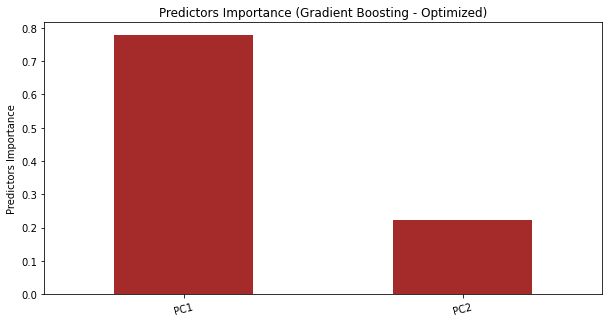

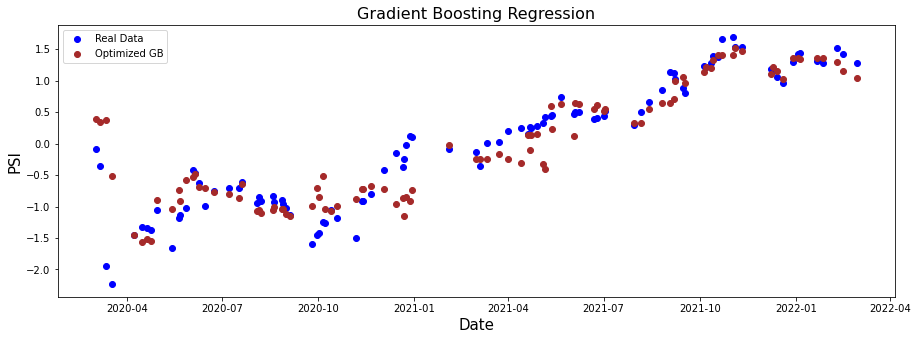

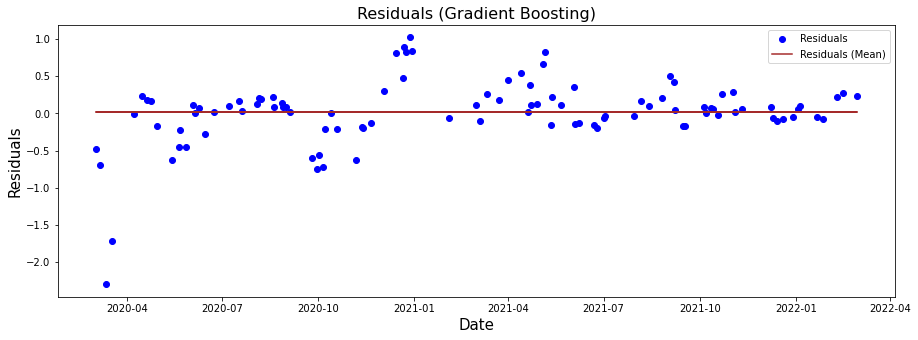

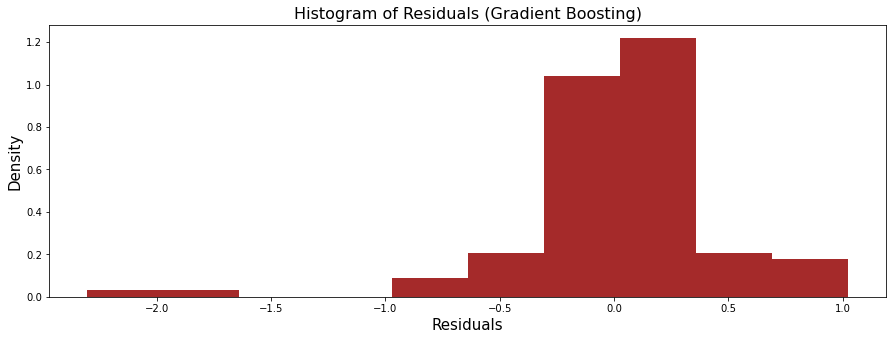

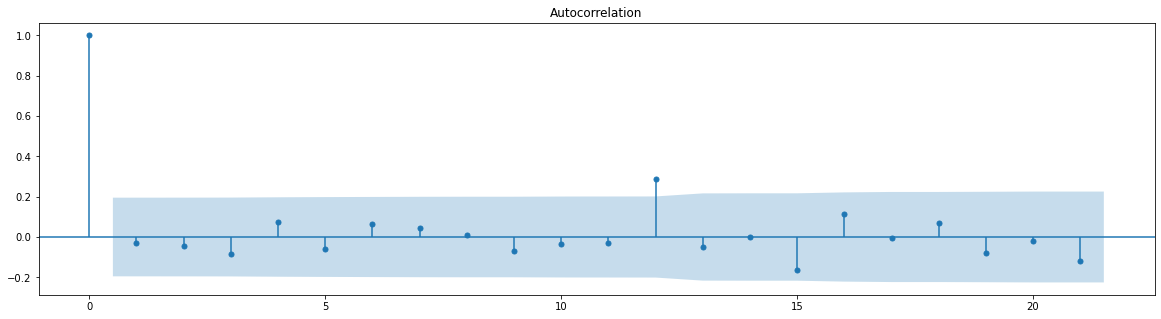

In [20]:
# Gradient Boosting Regression

################
### Fit Model
################
optimize_GB = GradientBoostingRegressor(learning_rate=learning_rate_opt, n_estimators=n_estimators_opt,max_depth=max_depth_opt, min_samples_split=min_samples_split_opt, min_samples_leaf=min_samples_leaf_opt, subsample=subsample_opt,max_features=max_features_opt, random_state = 8)
optimize_GB.fit(X_train,Y_train)

################
### Prediction
################

# Prediction
predictors_GB=list(X_train)
fig, ax = plt.subplots(figsize=(10,5))
pred_importance= pd.Series(optimize_GB.feature_importances_, predictors_GB).sort_values(ascending=False)
pred_importance.plot.bar( color = 'brown')
plt.ylabel('Predictors Importance')
plt.title('Predictors Importance (Gradient Boosting - Optimized)')
ax.tick_params(axis='x', rotation=15)
optimize_GB_pred=optimize_GB.predict(X_test)
optimize_GB_pred = pd.DataFrame(optimize_GB_pred)
coefs_optimize_GB_df = pd.DataFrame(optimize_GB.feature_importances_)
coefs_optimize_GB_df.rename(columns = {0:'Coefficients'}, inplace = True)
coefs_optimize_GB_df['Predictors'] = predictors_GB
coefs_optimize_GB_df.set_index('Predictors', inplace = True)
coefs_optimize_GB_df = coefs_optimize_GB_df.sort_values(by=['Coefficients'], ascending = False)
print(" "* 5,"\n\033[1mGradient Boosting Model (Optimized)\033[0m")
with pd.option_context('expand_frame_repr', False):
    display(coefs_optimize_GB_df)
    print("-"*120)

#Plotting
optimize_GB_pred.rename(columns = {0: 'Gradient Boosting Optimized'}, inplace = True)
Y_test = Y_test.reset_index()
optimize_GB_pred['Date'] = Y_test['Date']
optimize_GB_pred.set_index('Date', inplace=True)
Y_test.set_index('Date', inplace=True)
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(Y_test, 'o', c='b', label="Real Data")
ax.plot(optimize_GB_pred, 'o', c='brown', label="Optimized GB")
ax.set_title('Gradient Boosting Regression',{'fontsize': 16})
ax.set_xlabel('Date',{'fontsize': 15})
ax.set_ylabel('PSI',{'fontsize': 15})
ax.legend()

################
### Residuals
################

#Residuals
residuals_optimize_GB_df = pd.DataFrame(Y_test.values - optimize_GB_pred.values,columns=Y_test.columns)
residuals_optimize_GB_df.rename(columns = {'psi':'Residuals'}, inplace = True)
residuals_optimize_GB_df.index = Y_test.index
residuals_optimize_GB_df = residuals_optimize_GB_df.reset_index()
residuals_optimize_GB_df['mean'] = residuals_optimize_GB_df['Residuals'].mean()
print(" "* 5,"\n\033[1mResiduals\033[0m")
display(residuals_optimize_GB_df)

# Plotting
fig,ax = plt.subplots(figsize=(15,5))
ax.plot(residuals_optimize_GB_df['Date'],residuals_optimize_GB_df['Residuals'], 'o', c='b', label='Residuals')
ax.plot(residuals_optimize_GB_df['Date'],residuals_optimize_GB_df['mean'], c='brown', label='Residuals (Mean)')
ax.set_title('Residuals (Gradient Boosting)',{'fontsize': 16})
ax.set_xlabel('Date',{'fontsize': 15})
ax.set_ylabel('Residuals',{'fontsize': 15})
ax.legend()
fig,ax = plt.subplots(figsize=(15,5))
ax.hist(residuals_optimize_GB_df['Residuals'],color = 'brown',density = True)
ax.set_title('Histogram of Residuals (Gradient Boosting)',{'fontsize': 16})
ax.set_xlabel('Residuals',{'fontsize': 15})
ax.set_ylabel('Density',{'fontsize': 15})

# ACF of Residuals
plt.figure(figsize=(20,5))
acf =plot_acf(residuals_optimize_GB_df['Residuals'], ax=plt.gca())

# Durbin Watson Test
print("-"*120)
print("\n\033[1mDurbin-Watson Test for Residuals:\033[0m",durbin_watson(Y_test.values - optimize_GB_pred.values))



In [21]:
# MLP Regressor - Optimize Parameters

################
### Optimize Parameters
################

optimize = {'hidden_layer_sizes': tuple(np.random.randint(1,100,size=3)),'activation': ['relu','tanh','logistic'], 'alpha' : uniform(0.0001,0.1),'solver': ['lbfgs', 'sgd', 'adam']}

optimize_MLP = RandomizedSearchCV(estimator =MLPRegressor(), param_distributions = optimize,n_jobs=-1, cv=5, n_iter = 100,random_state = 8)
optimize_MLP.fit(X_train,Y_train)

best_params_MLP = pd.DataFrame(optimize_MLP.best_params_.items())
best_params_MLP= best_params_MLP.rename(columns={0: 'Predictors',1:'Best Values'}) 
best_score_MLP_list = []
best_score_MLP_list.append(optimize_MLP.best_score_)
best_score_MLP = pd.DataFrame(best_score_MLP_list)
best_score_MLP= best_score_MLP.rename(columns={0: 'Best Score'})

display(best_params_MLP.style.hide_index())
display(best_score_MLP.style.hide_index())

################
### Parameters to list
################
hidden_layer_sizes = best_params_MLP.loc[best_params_MLP['Predictors'] == 'hidden_layer_sizes', 'Best Values'].item()
activation = best_params_MLP.loc[best_params_MLP['Predictors'] == 'activation', 'Best Values'].item()
alpha = best_params_MLP.loc[best_params_MLP['Predictors'] == 'alpha', 'Best Values'].item()
solver = best_params_MLP.loc[best_params_MLP['Predictors'] == 'solver', 'Best Values'].item()


hidden_layer_sizes = int(hidden_layer_sizes)


print("\n\033[1mBest Estimator:\033[0m\n", optimize_MLP.best_estimator_)

C:\Users\Alexandre Arriaga\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Predictors,Best Values
activation,relu
alpha,0.017141
hidden_layer_sizes,91
solver,lbfgs


Best Score
0.843112



Best Estimator:
 MLPRegressor(alpha=0.01714053770320233, hidden_layer_sizes=91, solver='lbfgs')


      
Residuals


C:\Users\Alexandre Arriaga\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


,Date,Residuals,mean
0,2021-12-10,0.134836,0.00461
1,2021-05-04,0.221254,0.00461
2,2021-03-23,0.147957,0.00461
3,2020-11-13,-0.069856,0.00461
4,2020-08-20,0.086597,0.00461
...,...,...,...
96,2021-07-01,-0.015654,0.00461
97,2021-06-25,-0.143489,0.00461
98,2021-09-07,-0.016725,0.00461
99,2020-11-20,0.036672,0.00461


------------------------------------------------------------------------------------------------------------------------

Durbin-Watson Test for Residuals: [2.04567568]


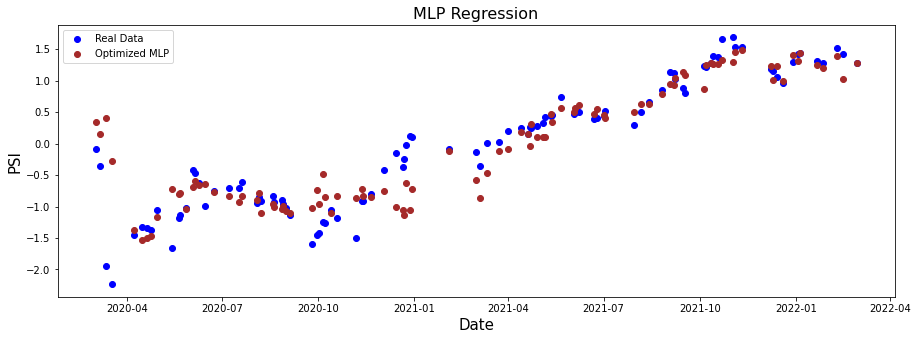

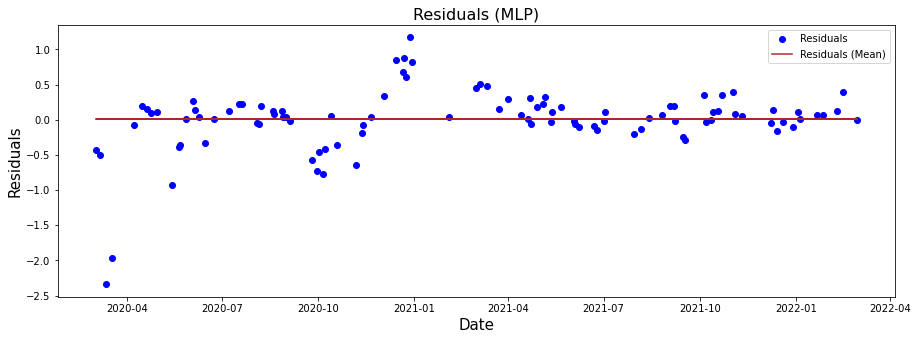

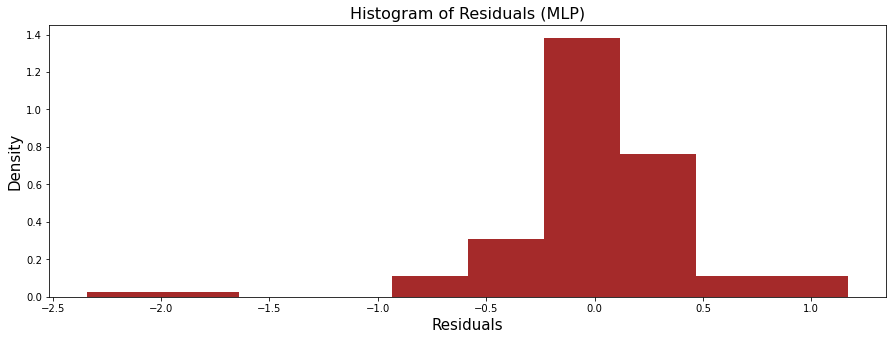

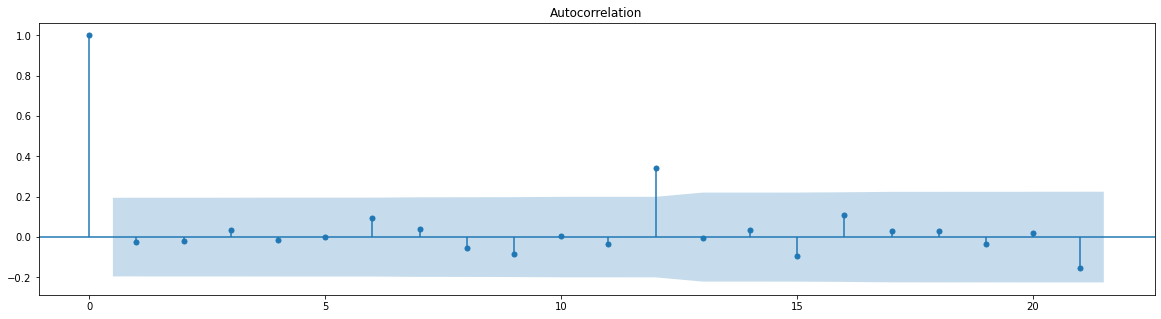

In [22]:
# MLP Regression

################
### Fit Model
################
optimize_MLP = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes,activation=activation,alpha=alpha,solver=solver, random_state = 8)
optimize_MLP.fit(X_train,Y_train)

################
### Prediction
################

#Prediction
optimize_MLP_pred=optimize_MLP.predict(X_test)
optimize_MLP_pred = pd.DataFrame(optimize_MLP_pred)

#Plotting
optimize_MLP_pred.rename(columns = {0: 'MLP Optimized'}, inplace = True)
Y_test = Y_test.reset_index()
optimize_MLP_pred['Date'] = Y_test['Date']
optimize_MLP_pred.set_index('Date', inplace=True)
Y_test.set_index('Date', inplace=True)
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(Y_test, 'o', c='b', label="Real Data")
ax.plot(optimize_MLP_pred, 'o', c='brown', label="Optimized MLP")
ax.set_title('MLP Regression',{'fontsize': 16})
ax.set_xlabel('Date',{'fontsize': 15})
ax.set_ylabel('PSI',{'fontsize': 15})
ax.legend()

################
### Residuals
################

# Residuals
residuals_optimize_MLP_df = pd.DataFrame(Y_test.values - optimize_MLP_pred.values,columns=Y_test.columns)
residuals_optimize_MLP_df.rename(columns = {'psi':'Residuals'}, inplace = True)
residuals_optimize_MLP_df.index = Y_test.index
residuals_optimize_MLP_df = residuals_optimize_MLP_df.reset_index()
residuals_optimize_MLP_df['mean'] = residuals_optimize_MLP_df['Residuals'].mean()
print(" "* 5,"\n\033[1mResiduals\033[0m")
display(residuals_optimize_MLP_df)

# Plotting
fig,ax = plt.subplots(figsize=(15,5))
ax.plot(residuals_optimize_MLP_df['Date'],residuals_optimize_MLP_df['Residuals'], 'o', c='b', label='Residuals')
ax.plot(residuals_optimize_MLP_df['Date'],residuals_optimize_MLP_df['mean'], c='brown', label='Residuals (Mean)')
ax.set_title('Residuals (MLP)',{'fontsize': 16})
ax.set_xlabel('Date',{'fontsize': 15})
ax.set_ylabel('Residuals',{'fontsize': 15})
ax.legend()
fig,ax = plt.subplots(figsize=(15,5))
ax.hist(residuals_optimize_MLP_df['Residuals'],color = 'brown',density = True)
ax.set_title('Histogram of Residuals (MLP)',{'fontsize': 16})
ax.set_xlabel('Residuals',{'fontsize': 15})
ax.set_ylabel('Density',{'fontsize': 15})

# ACF of Residuals
plt.figure(figsize=(20,5))
acf =plot_acf(residuals_optimize_MLP_df['Residuals'], ax=plt.gca())

# Durbin-Watson Test
print("-"*120)
print("\n\033[1mDurbin-Watson Test for Residuals:\033[0m",durbin_watson(Y_test.values - optimize_MLP_pred.values))


In [23]:
# Random Forest Regressor - Optimize Parameters

################
### Optimize Parameters
################

optimize = {'n_estimators' : randint(100, 1000),'max_depth': randint(2, 10),'min_samples_split':randint(2, 10),'min_samples_leaf': randint(5,15),'max_features':randint(2,10)}

optimize_RF = RandomizedSearchCV(estimator =RandomForestRegressor(), param_distributions = optimize,n_jobs=-1, cv=5, n_iter = 100, random_state = 8)
optimize_RF.fit(X_train,Y_train)


best_params_RF = pd.DataFrame(optimize_RF.best_params_.items())
best_params_RF= best_params_RF.rename(columns={0: 'Predictors',1:'Best Values'}) 
best_score_RF_list = []
best_score_RF_list.append(optimize_RF.best_score_)
best_score_RF = pd.DataFrame(best_score_RF_list)
best_score_RF= best_score_RF.rename(columns={0: 'Best Score'})

display(best_params_RF.style.hide_index())
display(best_score_RF.style.hide_index())

################
### Parameters to List
################
max_depth_opt = best_params_RF.loc[best_params_RF['Predictors'] == 'max_depth', 'Best Values'].item()
max_features_opt = best_params_RF.loc[best_params_RF['Predictors'] == 'max_features', 'Best Values'].item()
min_samples_leaf_opt = best_params_RF.loc[best_params_RF['Predictors'] == 'min_samples_leaf', 'Best Values'].item()
min_samples_split_opt = best_params_RF.loc[best_params_RF['Predictors'] == 'min_samples_split', 'Best Values'].item()
n_estimators_opt = best_params_RF.loc[best_params_RF['Predictors'] == 'n_estimators', 'Best Values'].item()

max_depth_opt = int(max_depth_opt)
max_features_opt = int(max_features_opt)
min_samples_leaf_opt = int(min_samples_leaf_opt)
min_samples_split_opt = int(min_samples_split_opt)
n_estimators_opt = int(n_estimators_opt)

print("\n\033[1mBest Estimator:\033[0m\n", optimize_RF.best_estimator_)

Predictors,Best Values
max_depth,6
max_features,2
min_samples_leaf,5
min_samples_split,6
n_estimators,284


Best Score
0.805110



Best Estimator:
 RandomForestRegressor(max_depth=6, max_features=2, min_samples_leaf=5,
                      min_samples_split=6, n_estimators=284)


      
Random Forest Model (Optimized)


,Coefficients
Predictors,
PC1,0.817589
PC2,0.182411


------------------------------------------------------------------------------------------------------------------------
      
Residuals


,Date,Residuals,mean
0,2021-12-10,-0.044465,0.02578
1,2021-05-04,1.128574,0.02578
2,2021-03-23,0.517844,0.02578
3,2020-11-13,-0.030140,0.02578
4,2020-08-20,0.080084,0.02578
...,...,...,...
96,2021-07-01,-0.009736,0.02578
97,2021-06-25,-0.187408,0.02578
98,2021-09-07,-0.094853,0.02578
99,2020-11-20,0.058322,0.02578


------------------------------------------------------------------------------------------------------------------------

Durbin-Watson Test for Residuals: [1.9789212]


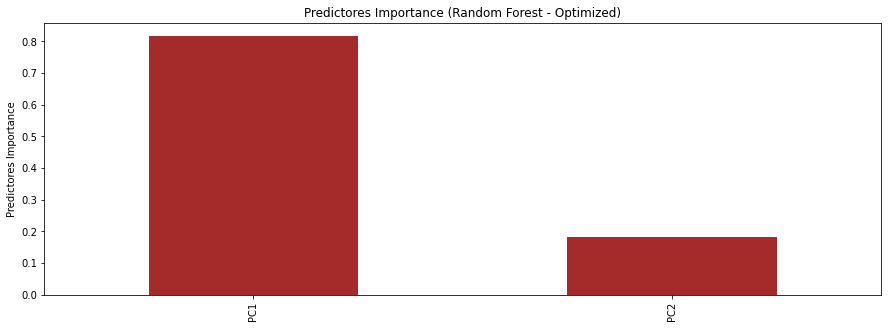

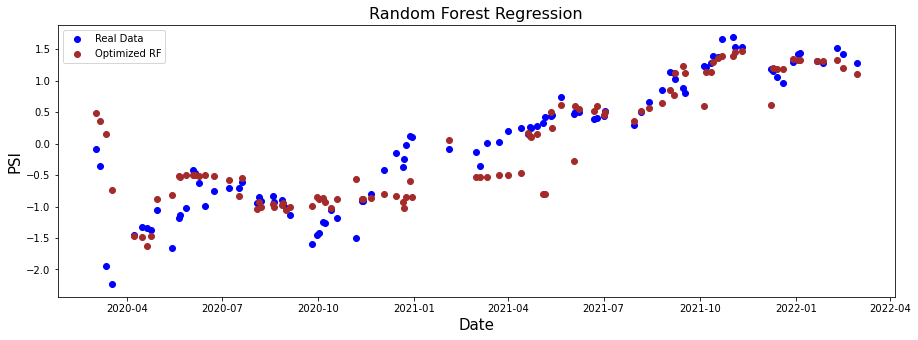

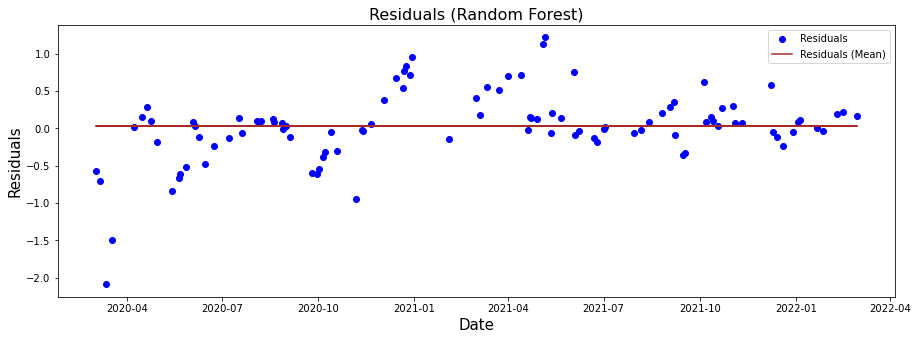

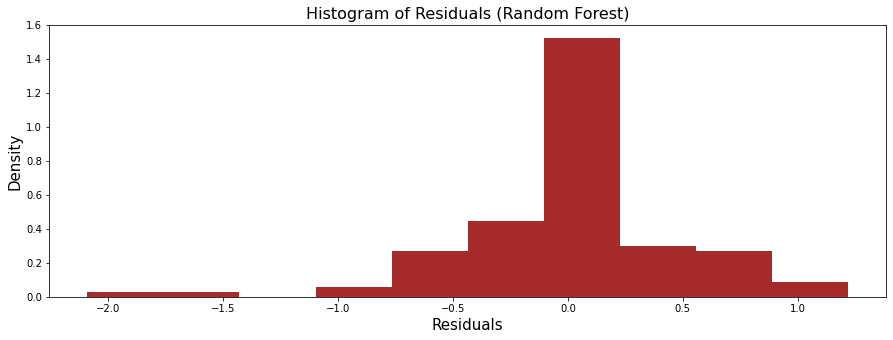

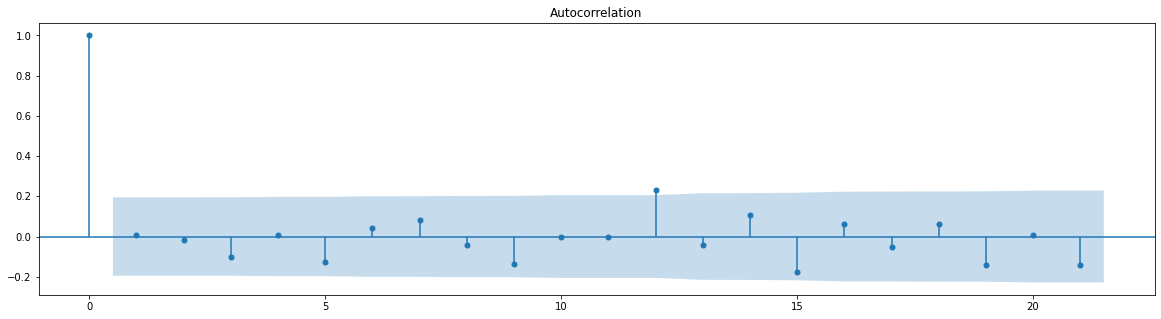

In [24]:
# Random Forest Regression

################
### Fit Model
################
optimize_RF = RandomForestRegressor(n_estimators=n_estimators_opt,max_depth=max_depth_opt, min_samples_split=min_samples_split_opt, min_samples_leaf=min_samples_leaf_opt,max_features=max_features_opt, random_state = 8)
optimize_RF.fit(X_train,Y_train)

################
### Prediction
################

# Prediction
predictors_RF=list(X_train)
fig, ax = plt.subplots(figsize=(15,5))
pred_importance= pd.Series(optimize_RF.feature_importances_, predictors_RF).sort_values(ascending=False)
pred_importance.plot.bar( color = 'brown')
plt.ylabel('Predictores Importance')
plt.title('Predictores Importance (Random Forest - Optimized)')
optimize_RF_pred=optimize_RF.predict(X_test)
optimize_RF_pred = pd.DataFrame(optimize_RF_pred)
coefs_optimize_RF_df = pd.DataFrame(optimize_RF.feature_importances_)
coefs_optimize_RF_df.rename(columns = {0:'Coefficients'}, inplace = True)
coefs_optimize_RF_df['Predictors'] = predictors_RF
coefs_optimize_RF_df.set_index('Predictors', inplace = True)
coefs_optimize_RF_df = coefs_optimize_RF_df.sort_values(by=['Coefficients'], ascending = False)
print(" "* 5,"\n\033[1mRandom Forest Model (Optimized)\033[0m")
with pd.option_context('expand_frame_repr', False):
    display(coefs_optimize_RF_df)
    print("-"*120)

# Plotting
optimize_RF_pred.rename(columns = {0: 'Random Forest Optimized'}, inplace = True)
Y_test = Y_test.reset_index()
optimize_RF_pred['Date'] = Y_test['Date']
optimize_RF_pred.set_index('Date', inplace=True)
Y_test.set_index('Date', inplace=True)
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(Y_test, 'o', c='b', label="Real Data")
ax.plot(optimize_RF_pred, 'o', c='brown', label="Optimized RF")
ax.set_title('Random Forest Regression',{'fontsize': 16})
ax.set_xlabel('Date',{'fontsize': 15})
ax.set_ylabel('PSI',{'fontsize': 15})
ax.legend()

################
### Residuals
################

# Residuals
residuals_optimize_RF_df = pd.DataFrame(Y_test.values - optimize_RF_pred.values,columns=Y_test.columns)
residuals_optimize_RF_df.rename(columns = {'psi':'Residuals'}, inplace = True)
residuals_optimize_RF_df.index = Y_test.index
residuals_optimize_RF_df = residuals_optimize_RF_df.reset_index()
residuals_optimize_RF_df['mean'] = residuals_optimize_RF_df['Residuals'].mean()
print(" "* 5,"\n\033[1mResiduals\033[0m")
display(residuals_optimize_RF_df)

# Plotting
fig,ax = plt.subplots(figsize=(15,5))
ax.plot(residuals_optimize_RF_df['Date'],residuals_optimize_RF_df['Residuals'], 'o', c='b', label='Residuals')
ax.plot(residuals_optimize_RF_df['Date'],residuals_optimize_RF_df['mean'], c='brown', label='Residuals (Mean)')
ax.set_title('Residuals (Random Forest)',{'fontsize': 16})
ax.set_xlabel('Date',{'fontsize': 15})
ax.set_ylabel('Residuals',{'fontsize': 15})
ax.legend()
fig,ax = plt.subplots(figsize=(15,5))
ax.hist(residuals_optimize_RF_df['Residuals'],color = 'brown',density = True)
ax.set_title('Histogram of Residuals (Random Forest)',{'fontsize': 16})
ax.set_xlabel('Residuals',{'fontsize': 15})
ax.set_ylabel('Density',{'fontsize': 15})

# ACF of Residuals
plt.figure(figsize=(20,5))
acf =plot_acf(residuals_optimize_RF_df['Residuals'], ax=plt.gca())

# Durbin-Watson Test
print("-"*120)
print("\n\033[1mDurbin-Watson Test for Residuals:\033[0m",durbin_watson(Y_test.values - optimize_RF_pred.values))

------------------------------------------------------------------------------------------------------------------------
      
Ridge Regression                                                OLS Regression

------------------------------------------------------------------------------------------------------------------------

MAE                                                             MAE
MAE: 0.4947647545715484                                         MAE: 0.4947650720692668

MSE                                                             MSE
MSE: 0.37001395203934134                                         MSE: 0.3700135106046386

Median Absolute Error                                           Median Absolute Error
Median Absolute Error: 0.4859952052259111                       Median Absolute Error: 0.4859934133969721

Explained Variance Score                                        Explained Variance Score
Explained Variance Score: 0.6325757782959502                   Explained 

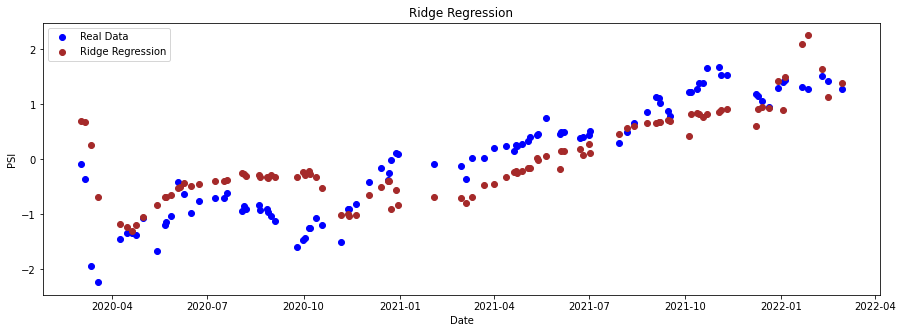

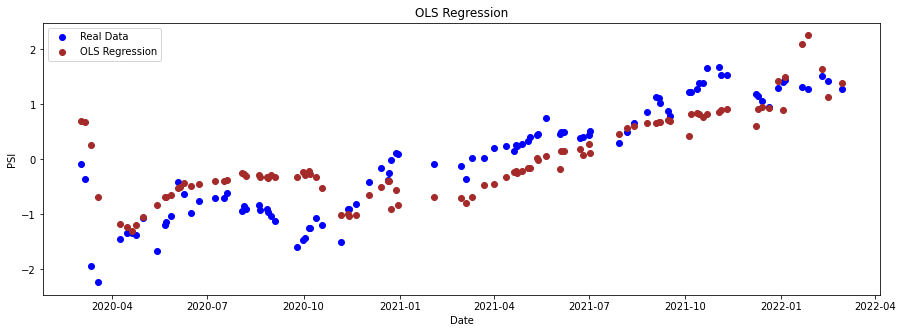

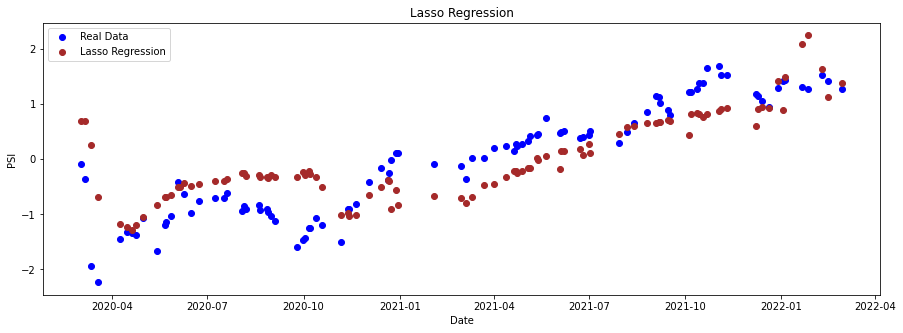

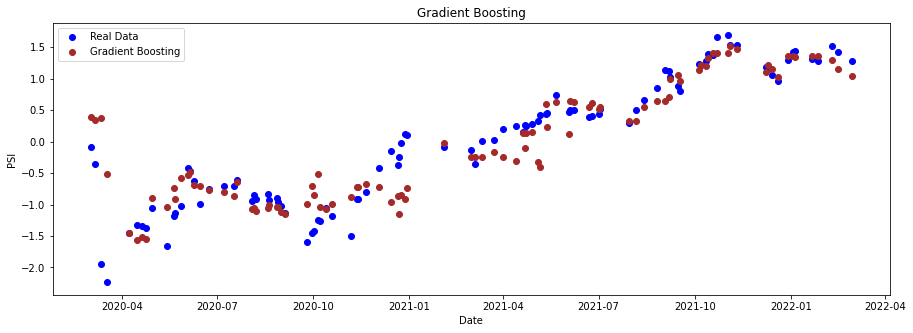

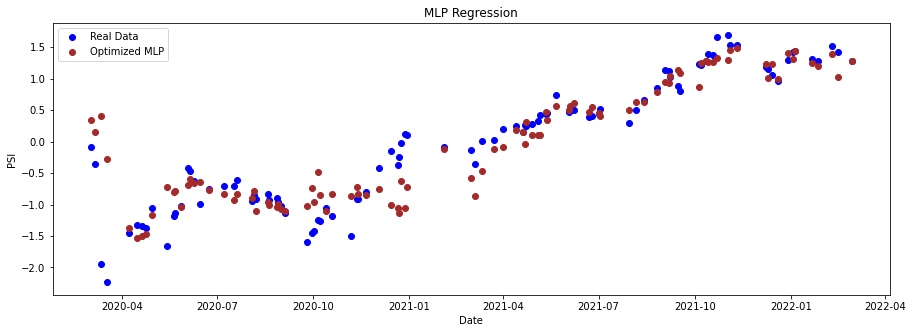

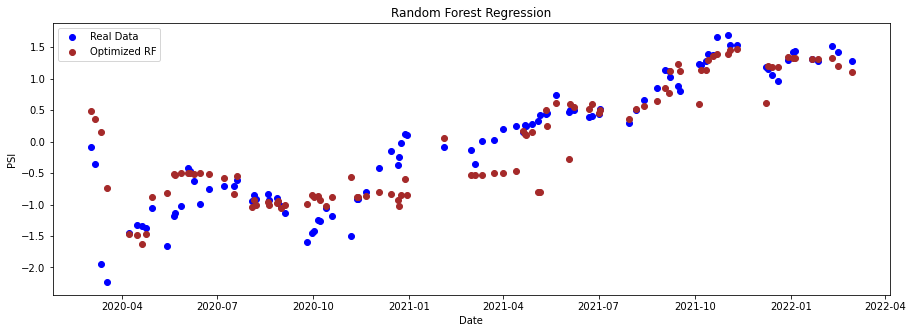

In [25]:
####################### Comparing Models (OLS Regression vs Ridge Regression vs Lasso Regression vs Bayesian Ridge Regression vs Gradient Boosting vs MLP vs Random Forest) #####################
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(Y_test, 'o',  c='b', label="Real Data")
ax.plot(Y_test_pred_Ridge, 'o',c='brown', label="Ridge Regression")
ax.set_title('Ridge Regression')
ax.set_xlabel('Date')
ax.set_ylabel('PSI')
ax.legend(loc="best")
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(Y_test, 'o',c='b', label="Real Data")
ax.plot(Y_test_pred_ols, 'o',c='brown', label="OLS Regression")
ax.set_title('OLS Regression')
ax.set_xlabel('Date')
ax.set_ylabel('PSI')
ax.legend(loc="best")
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(Y_test, 'o',c='b', label="Real Data")
ax.plot(Y_test_pred_Lasso, 'o',c='brown', label="Lasso Regression")
ax.set_title('Lasso Regression')
ax.set_xlabel('Date')
ax.set_ylabel('PSI')
ax.legend(loc="best")
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(Y_test, 'o',c='b', label="Real Data")
ax.plot(optimize_GB_pred, 'o',c='brown', label="Gradient Boosting")
ax.legend(loc="best")
ax.set_title('Gradient Boosting')
ax.set_xlabel('Date')
ax.set_ylabel('PSI')
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(Y_test, 'o',c='b', label="Real Data")
ax.plot(optimize_MLP_pred, 'o',c='brown', label="Optimized MLP")
ax.legend(loc="best")
ax.set_title('MLP Regression')
ax.set_xlabel('Date')
ax.set_ylabel('PSI')
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(Y_test, 'o',c='b', label="Real Data")
ax.plot(optimize_RF_pred, 'o',c='brown', label="Optimized RF")
ax.legend(loc="best")
ax.set_title('Random Forest Regression')
ax.set_xlabel('Date')
ax.set_ylabel('PSI')

print("-"*120)
print(" "* 5,"\n\033[1mRidge Regression\033[0m"," "* 46, "\033[1mOLS Regression\033[0m\n" )
print("-"*120)

#### OLS and Ridge
# Mean absolute error 
print("\n\033[1mMAE\033[0m"," "*59 ,"\033[1mMAE\033[0m")
print("MAE:" , skl.mean_absolute_error(Y_test, Y_test_pred_Ridge)," "* 39 ,"MAE:" , skl.mean_absolute_error(Y_test, Y_test_pred_ols)                                                       )
# Mean squared error 
print("\n\033[1mMSE\033[0m"," "* 59,"\033[1mMSE\033[0m")
print("MSE:" , skl.mean_squared_error(Y_test, Y_test_pred_Ridge)," "* 39 ,"MSE:" , skl.mean_squared_error(Y_test, Y_test_pred_ols))
# Median absolute error 
print("\n\033[1mMedian Absolute Error\033[0m"," "* 41,"\033[1mMedian Absolute Error\033[0m")
print("Median Absolute Error:", skl.median_absolute_error(Y_test, Y_test_pred_Ridge)," "* 21 ,"Median Absolute Error:", skl.median_absolute_error(Y_test, Y_test_pred_ols)) 
# Explain variance score 
print("\n\033[1mExplained Variance Score\033[0m"," "* 38,"\033[1mExplained Variance Score\033[0m")
print("Explained Variance Score:" , skl.explained_variance_score(Y_test, Y_test_pred_Ridge)," "* 17 ,"Explained Variance Score:" , skl.explained_variance_score(Y_test, Y_test_pred_ols) )
# R2 Score
print("\n\033[1mR2 Score\033[0m"," "* 54,"\033[1mR2 Score\033[0m")
print("R2 Score:" , skl.r2_score(Y_test, Y_test_pred_Ridge)," "* 34 ,"R2 Score:" , skl.r2_score(Y_test, Y_test_pred_ols))

print("-"*120)
print(" "* 5,"\n\033[1mLasso Regression\033[0m"," "* 45, "\033[1m Gradient Boosting Regression\033[0m\n" )
print("-"*120) 

#### Lasso and Gradient Boosting
# Mean absolute error 
print("\n\033[1mMAE\033[0m"," "*59 ,"\033[1mMAE\033[0m")
print("MAE:" , skl.mean_absolute_error(Y_test, Y_test_pred_Lasso)," "* 39 ,"MAE:" , skl.mean_absolute_error(Y_test, optimize_GB_pred))                                                       
# Mean squared error 
print("\n\033[1mMSE\033[0m"," "* 59,"\033[1mMSE\033[0m")
print("MSE:" , skl.mean_squared_error(Y_test, Y_test_pred_Lasso)," "* 39 ,"MSE:" , skl.mean_squared_error(Y_test, optimize_GB_pred))
# Median absolute error 
print("\n\033[1mMedian Absolute Error\033[0m"," "* 41,"\033[1mMedian Absolute Error\033[0m")
print("Median Absolute Error:", skl.median_absolute_error(Y_test, Y_test_pred_Lasso)," "* 20 ,"Median Absolute Error:", skl.median_absolute_error(Y_test, optimize_GB_pred)) 
# Explain variance score 
print("\n\033[1mExplained Variance Score\033[0m"," "* 38,"\033[1mExplained Variance Score\033[0m")
print("Explained Variance Score:" , skl.explained_variance_score(Y_test, Y_test_pred_Lasso)," "* 18 ,"Explained Variance Score:" , skl.explained_variance_score(Y_test, optimize_GB_pred) )
# R2 Score
print("\n\033[1mR2 Score\033[0m"," "* 54,"\033[1mR2 Score\033[0m")
print("R2 Score:" , skl.r2_score(Y_test, Y_test_pred_Lasso)," "* 34 ,"R2 Score:" , skl.r2_score(Y_test, optimize_GB_pred))

print("-"*120)
print(" "* 5,"\n\033[1mMLP Regression\033[0m"," "* 46, "\033[1mRandom Forest Regression\033[0m\n" )
print("-"*120)

### MLP and Random Forest
# Mean absolute error 
print("\n\033[1mMAE\033[0m"," "*59 ,"\033[1mMAE\033[0m")
print("MAE:" , skl.mean_absolute_error(Y_test, optimize_MLP_pred)," "* 39 ,"MAE:" , skl.mean_absolute_error(Y_test, optimize_RF_pred))                                                   
# Mean squared error 
print("\n\033[1mMSE\033[0m"," "* 59,"\033[1mMSE\033[0m")
print("MSE:" , skl.mean_squared_error(Y_test,optimize_MLP_pred)," "* 39 ,"MSE:" , skl.mean_squared_error(Y_test, optimize_RF_pred))
# Median absolute error 
print("\n\033[1mMedian Absolute Error\033[0m"," "* 41,"\033[1mMedian Absolute Error\033[0m")
print("Median Absolute Error:", skl.median_absolute_error(Y_test, optimize_MLP_pred)," "* 20 ,"Median Absolute Error:", skl.median_absolute_error(Y_test, optimize_RF_pred))
# Explain variance score 
print("\n\033[1mExplained Variance Score\033[0m", " " * 38, "\033[1mExplained Variance Score\033[0m")
print("Explained Variance Score:" , skl.explained_variance_score(Y_test, optimize_MLP_pred)," "* 18 ,"Explained Variance Score:" , skl.explained_variance_score(Y_test, optimize_RF_pred))
# R2 Score
print("\n\033[1mR2 Score\033[0m"," "* 54,"\033[1mR2 Score\033[0m")
print("R2 Score:" , skl.r2_score(Y_test, optimize_MLP_pred)," "* 34 ,"R2 Score:" , skl.r2_score(Y_test, optimize_RF_pred))

print("-"*120)
print("\n")
print("-"*120) 